- 연구 논문을 읽고 그 핵심을 이해한 다음 이를 코드로 구현하는 것은 모든 딥러닝 학습자가 또는 연구자가 갖춰야 할 중요한 능력이다.
- 연구 논문의 내용을 실제로 구현해보는 과정은 논문의 저자가 거쳐 온 사고 과정을 이해하고 이를 진짜 유용한 문제를 푸는데 활용할 수 있도록 도와주는 열쇠이다.
- 연구 논문을 이해하고 그 내용을 코드로 능숙하게 옮기는 능력을 갖추어야 한다.
- 컴퓨터 비전은 매우 빠르게 발전하는 분야로, 항상 최신 연구를 접하며 지식의 최전선에서 뒤쳐지지 않도록 노력해야 한다.


# Lenet-5

LeNet은 CNN을 처음으로 개발한 얀 르쿤(Yann Lecun) 연구팀이 1998년에 개발한 CNN 알고리즘의 이름이다. original 논문 제목은 "Gradient-based learning applied to document recognition"이다.

참고 : https://bskyvision.com/418


네트워크를 보면,

<img src = 'https://t1.daumcdn.net/cfile/tistory/99170D4C5C7E21250E'>


그림1에서 볼 수 있듯이 LeNet-5는 인풋, 3개의 컨볼루션 레이어(C1, C3, C5), 2개의 서브샘플링 레이어(S2, S4), 1층의 full-connected 레이어(F6), 아웃풋 레이어로 구성되어 있다. 참고로 C1부터 F6까지 활성화 함수로 tanh을 사용한다.   

1)  C1 레이어: 입력 영상(여기서는 32 x 32 사이즈의 이미지)을 6개의 5 x 5 필터와 컨볼루션 연산을 해준다. 그 결과 6장의 28 x 28 특성 맵을 얻게 된다. 


2) S2 레이어: 6장의 28 x 28 특성 맵에 대해 서브샘플링을 진행한다. 결과적으로 28 x 28 사이즈의 특성 맵이 14 x 14 사이즈의 특성맵으로 축소된다. 2 x 2 필터를 stride 2로 설정해서 서브샘플링해주기 때문이다. 사용하는 서브샘플링 방법은 평균 풀링(average pooling)이다. 



평균풀링인데 왜 훈련해야할 파라미터가 필요한지 의아할 수 있는데, original 논문에 의하면 평균을 낸 후에 한 개의 훈련가능한 가중치(trainable weight)를 곱해주고 또 한 개의 훈련가능한 바이어스(trainable bias)를 더해준다고 한다. 그 값이 시그모이드 함수를 통해 활성화된다. 참고로 그 가중치와 바이어스는 시그모이드의 비활성도를 조절해준다고 한다. 

- Deep learning for Vision System Book 참고)

1. Load MNIST database

In [1]:
from keras.datasets import mnist

# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


2. Visualize the First six Training images

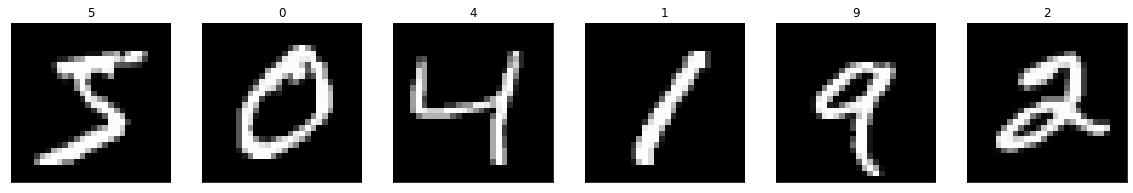

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

# plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

3. View an Image in More Detail

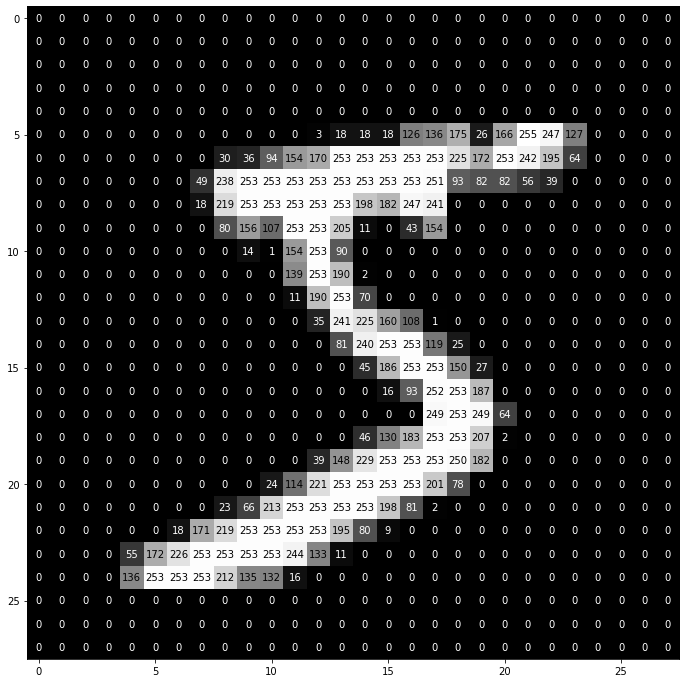

In [3]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

4. Preprocess input images : Rescale the Images by Dividing Every Pixel in Every Image by 255

In [4]:
# normalize the data to accelerate learning
mean = np.mean(X_train)
std = np.std(X_train)
X_train = (X_train-mean)/(std+1e-7)
X_test = (X_test-mean)/(std+1e-7)

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


5. Preprocess the lables : Encode Categorical Integer Labels Using a One-Hot Scheme

In [5]:
from keras.utils import np_utils

num_classes = 10 
# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


6. Reshape data to fit our CNN (and input_shape)

In [6]:
# input image dimensions 28x28 pixel images. 
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

print('image input shape: ', input_shape)
print('x_train shape:', X_train.shape)

image input shape:  (28, 28, 1)
x_train shape: (60000, 28, 28, 1)


7. Define the Model Architecture

<img src = 'https://raw.githubusercontent.com/moelgendy/deep_learning_for_vision_systems/2c9d077b43003657cd8f6d5ddfb6f83ee8bae1f3/chapter_05/images/lenet_architecture.png'>

To implement LeNet-5 in Keras, read the original paper and extract the architecture information from pages 6, 7 and 8. Here are the main takeaways to build the LeNet-5 network:

- Number of filters in each CONV layer: you can see from the diagram (and defined in the paper) that the depth (number of filters) of each convolutional layer is as follows: C1 = 6, C3 = 16, C5 = 120 layers.
- Kernel size of each CONV layer: from the paper, the kernel_size is = 5 x 5

- A subsampling layer (POOL) is added after each convolutional layer. The receptive field of each unit is a 2 x 2 area (i.e. pool_size = 2). Note that the LeNet-5 creators used average pooling which computes the average value of its inputs instead of the max pooling layer that we used in our earlier projects which passes the maximum value of its inputs. You can try both if you are interested to see the difference. For this experiment, we are going to follow the paper architecture.

- Activation function: the creators of LeNet-5 used tanh activation function for the hidden layers because symmetric functions are believed to yield faster convergence compared to sigmoid functions. In general, you are strongly encouraged to add a ReLU activation function to every convolutional layer in your networks.

- Things to remember

- Always add a ReLU activation function to the Conv2D layers in your CNN. With the exception of the final layer in the network, Dense layers should also have a ReLU activation function.

- When constructing a network for classification, the final layer in the network should be a Dense (FC) layer with a softmax activation function. The number of nodes in the final layer should equal the total number of classes in the dataset.

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

In [8]:
#Instantiate an empty model
model = Sequential()

# C1 Convolutional Layer
model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=input_shape, padding='same'))

# S2 Pooling Layer
model.add(AveragePooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# C3 Convolutional Layer
model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# S4 Pooling Layer
model.add(AveragePooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# C5 Fully Connected Convolutional Layer
model.add(Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

#Flatten the CNN output so that we can connect it with fully connected layers
model.add(Flatten())

# FC6 Fully Connected Layer
model.add(Dense(84, activation='tanh'))

# Output Layer with softmax activation
model.add(Dense(10, activation='softmax'))

# print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

8. Compile the Model

In this exercise, we will use Adam optimizer

In [9]:
# the loss function is categorical cross entropy since we have multiple classes (10) 


# compile the model by defining the loss function, optimizer, and performance metric
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

9. Train the Model

LeCun and his team used scheduled decay learning where the value of the learning rate was decreased using the following schedule: 0.0005 for the first two epochs, 0.0002 for the next three epochs, 0.00005 for the next four, and then 0.00001 thereafter. In the paper, the authors trained their network for 20 epochs.

In [10]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler

# set the learning rate schedule as created in the original paper
def lr_schedule(epoch):
    if epoch <= 2:     
        lr = 5e-4
    elif epoch > 2 and epoch <= 5:
        lr = 2e-4
    elif epoch > 5 and epoch <= 9:
        lr = 5e-5
    else: 
        lr = 1e-5
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

# set the checkpointer
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)

# train the model
hist = model.fit(X_train, y_train, batch_size=32, epochs=20,
          validation_data=(X_test, y_test), callbacks=[checkpointer, lr_scheduler], 
          verbose=2, shuffle=True)

Epoch 1/20

Epoch 1: val_loss improved from inf to 0.08104, saving model to model.weights.best.hdf5
1875/1875 - 15s - loss: 0.2260 - accuracy: 0.9337 - val_loss: 0.0810 - val_accuracy: 0.9752 - lr: 5.0000e-04 - 15s/epoch - 8ms/step
Epoch 2/20

Epoch 2: val_loss improved from 0.08104 to 0.05516, saving model to model.weights.best.hdf5
1875/1875 - 5s - loss: 0.0767 - accuracy: 0.9769 - val_loss: 0.0552 - val_accuracy: 0.9824 - lr: 5.0000e-04 - 5s/epoch - 3ms/step
Epoch 3/20

Epoch 3: val_loss improved from 0.05516 to 0.04909, saving model to model.weights.best.hdf5
1875/1875 - 5s - loss: 0.0560 - accuracy: 0.9828 - val_loss: 0.0491 - val_accuracy: 0.9843 - lr: 5.0000e-04 - 5s/epoch - 3ms/step
Epoch 4/20

Epoch 4: val_loss improved from 0.04909 to 0.03796, saving model to model.weights.best.hdf5
1875/1875 - 5s - loss: 0.0345 - accuracy: 0.9897 - val_loss: 0.0380 - val_accuracy: 0.9870 - lr: 2.0000e-04 - 5s/epoch - 3ms/step
Epoch 5/20

Epoch 5: val_loss improved from 0.03796 to 0.03548, sa

10. Load the Model with the Best Classification Accuracy on the Validation Set

In [11]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

11. Calculate the Classification Accuracy on the Test Set

In [12]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 98.9900%


12. evaluate the model

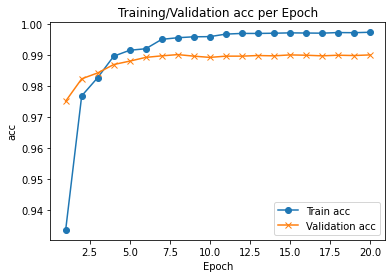

In [13]:
import matplotlib.pyplot as plt

f, ax = plt.subplots()
ax.plot([None] + hist.history['accuracy'], 'o-')
ax.plot([None] + hist.history['val_accuracy'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')
plt.show()

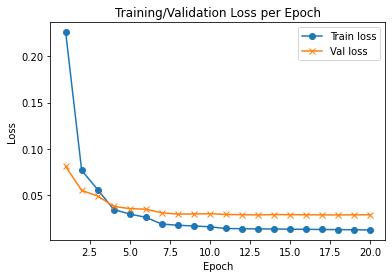

In [14]:
import matplotlib.pyplot as plt

f, ax = plt.subplots()
ax.plot([None] + hist.history['loss'], 'o-')
ax.plot([None] + hist.history['val_loss'], 'x-')

# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train loss', "Val loss"], loc = 0)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.show()

# AlexNet

AlexNet의 기본구조는 LeNet-5와 크게 다르지 않다. 2개의 GPU로 병렬연산을 수행하기 위해서 병렬적인 구조로 설계되었다는 점이 가장 큰 변화이다. AlexNet의 구조도를 살펴보자

<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99FEB93C5C80B5192E'>

AlexNet은 8개의 레이어로 구성되어 있다. 5개의 컨볼루션 레이어와 3개의 full-connected 레이어로 구성되어 있다. 두번째, 네번째, 다섯번째 컨볼루션 레이어들은 전 단계의 같은 채널의 특성맵들과만 연결되어 있는 반면, 세번째 컨볼루션 레이어는 전 단계의 두 채널의 특성맵들과 모두 연결되어 있다.

이제 각 레이어마다 어떤 작업이 수행되는지 살펴보자. 우선 AlexNet에 입력 되는 것은 227 x 227 x 3 이미지다. (227 x 227 사이즈의 RGB 컬러 이미지를 뜻한다.) 그림에는 224로 되어 있는데 잘못된 겁니다. 

<img src = 'https://raw.githubusercontent.com/moelgendy/deep_learning_for_vision_systems/2c9d077b43003657cd8f6d5ddfb6f83ee8bae1f3/chapter_05/images/alexnet_architecture.png'>

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense,Activation,MaxPool2D, BatchNormalization, Dropout
from keras.regularizers import l2

In [16]:
# Instantiate an empty sequential model
model = Sequential(name="Alexnet")
# 1st layer (conv + pool + batchnorm)
model.add(Conv2D(filters= 96, kernel_size= (11,11), strides=(4,4), padding='valid', kernel_regularizer=l2(0.0005),
input_shape = (227,227,3)))
model.add(Activation('relu'))  #<---- activation function can be added on its own layer or within the Conv2D function
model.add(MaxPool2D(pool_size=(3,3), strides= (2,2), padding='valid'))
model.add(BatchNormalization())
    
# 2nd layer (conv + pool + batchnorm)
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same', kernel_regularizer=l2(0.0005)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding='valid'))
model.add(BatchNormalization())
            
# layer 3 (conv + batchnorm)      <--- note that the authors did not add a POOL layer here
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', kernel_regularizer=l2(0.0005)))
model.add(Activation('relu'))
model.add(BatchNormalization())
        
# layer 4 (conv + batchnorm)      <--- similar to layer 3
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', kernel_regularizer=l2(0.0005)))
model.add(Activation('relu'))
model.add(BatchNormalization())
            
# layer 5 (conv + batchnorm)  
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', kernel_regularizer=l2(0.0005)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding='valid'))

# Flatten the CNN output to feed it with fully connected layers
model.add(Flatten())

# layer 6 (Dense layer + dropout)  
model.add(Dense(units = 4096, activation = 'relu'))
model.add(Dropout(0.5))

# layer 7 (Dense layers) 
model.add(Dense(units = 4096, activation = 'relu'))
model.add(Dropout(0.5))
                           
# layer 8 (softmax output layer) 
model.add(Dense(units = 1000, activation = 'softmax'))

# print the model summary
model.summary()

Model: "Alexnet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 55, 55, 96)        34944     
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_4 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 activation_1 (Activation)   (None, 27, 27, 256)       0   

# VGG-16/19

VGGNet은 16개 또는 19개의 층으로 구성된 모델을 의미한다(VGG16, VGG19로 불림). 이전에 포스팅한 VGG-F, VGG-M, VGG-S와는 차이가 있다. 그 모델들은 8개의 층을 가진 AlexNet과 유사한 모델들이다. 하지만 AlexNet와 같이 병렬적 구조로 이뤄지진 않았다. 

 - 역사적으로 봤을 때 VGGNet 모델부터 시작해서 네트워크의 깊이가 확 깊어졌다. 아래 그림을 참고하자. 

<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdrYEZ4%2FbtqwpSXYd8U%2FLF8RkIhWpAmsgR67nfnZsk%2Fimg.png'>

VGGNet은 사용하기 쉬운 구조와 좋은 성능 덕분에 그 대회에서 우승을 거둔 조금 더 복잡한 형태의 GoogLeNet보다 더 인기를 얻었다. 

개인적으로 나는 모든 필터 커널의 사이즈를 3 x 3으로 설정했기 때문에 네트워크의 깊이를 깊게 만들 수 있다고 생각한다. 왜냐하면 필터커널의 사이즈가 크면 그만큼 이미지의 사이즈가 금방 축소되기 때문에 네트워크의 깊이를 충분히 깊게 만들기 불가능하기 때문이다. 

<img src= 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fb1Vk5P%2FbtqwqjujKsa%2FTL2HyQ4kj6pNPz4TsirknK%2Fimg.png'>

그것은 바로 3 x 3 필터로 두 차례 컨볼루션을 하는 것과 5 x 5 필터로 한 번 컨볼루션을 하는 것이 결과적으로 동일한 사이즈의 특성맵을 산출한다는 것이다(아래 그림 참고). 3 x 3 필터로 세 차례 컨볼루션 하는 것은 7 x 7 필터로 한 번 컨볼루션 하는 것과 대응된다.

<img src ='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FT5kb2%2FbtqwonLQrNm%2Fd56nskDXEYoCWRDpxxkeAK%2Fimg.png'>

그러면 3 x 3 필터로 세 차례 컨볼루션을 하는 것이 7 x 7 필터로 한 번 컨볼루션하는 것보다 나은 점은 무엇일까? 일단 가중치 또는 파라미터의 갯수의 차이다. 3 x 3 필터가 3개면 총 27개의 가중치를 갖는다. 반면 7 x 7 필터는 49개의 가중치를 갖는다. CNN에서 가중치는 모두 훈련이 필요한 것들이므로, 가중치가 적다는 것은 그만큼 훈련시켜야할 것의 갯수가 작아진다. 따라서 학습의 속도가 빨라진다. 동시에 층의 갯수가 늘어나면서 특성에 비선형성을 더 증가시키기 때문에 특성이 점점 더 유용해진다. 

 

## VGG 구조
<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FK990l%2FbtqwDJ7C54R%2F664Ksm6gyTGBR1wK3YPDFk%2Fimg.png'>

<img src='https://raw.githubusercontent.com/moelgendy/deep_learning_for_vision_systems/2c9d077b43003657cd8f6d5ddfb6f83ee8bae1f3/chapter_05/images/vggnet_architecture.png'>

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Activation, MaxPool2D, BatchNormalization, Dropout, ZeroPadding2D

### VGG-16 (configuration D)

In [17]:
model = Sequential()

# first block
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same',input_shape=(224,224, 3)))
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

# second block
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

# third block
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

# forth block
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

# fifth block
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

# sixth block (classifier)
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1000, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 conv2d_9 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_11 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

### VGG-19 (configuration E)

In [18]:
vgg_19 = Sequential()

# first block
vgg_19.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same',input_shape=(224,224, 3)))
vgg_19.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_19.add(MaxPool2D((2,2), strides=(2,2)))

# second block
vgg_19.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_19.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_19.add(MaxPool2D((2,2), strides=(2,2)))

# third block
vgg_19.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_19.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_19.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_19.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_19.add(MaxPool2D((2,2), strides=(2,2)))

# forth block
vgg_19.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_19.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_19.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_19.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_19.add(MaxPool2D((2,2), strides=(2,2)))

# fifth block
vgg_19.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_19.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_19.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_19.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_19.add(MaxPool2D((2,2), strides=(2,2)))

# seventh block (classifier)
vgg_19.add(Flatten())
vgg_19.add(Dense(4096, activation='relu'))
vgg_19.add(Dropout(0.5))
vgg_19.add(Dense(4096, activation='relu'))
vgg_19.add(Dropout(0.5))
vgg_19.add(Dense(1000, activation='softmax'))

vgg_19.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_22 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_23 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_24 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

# Inception(Going Deeper With Convolutions)


참고 : https://kangbk0120.github.io/articles/2018-01/inception-googlenet-review

참고 : https://jjuon.tistory.com/26

[Going Deeper with Convolutions](https://arxiv.org/abs/1409.4842)

## Introduction

-  GoogLeNet은 본 논문에서 소개될 Inception 모듈의 한 형태이며, ILSVRC 2014에서 top-5 error 6.67%로 우승을 차지했습니다.

- GoogLeNEt은 22개의 층으로 구성되었으나(VGGNet보다 층수는 많다.)

- 최근 3년간(2012~2015) CNN 분야는 급속도로 발전해 왔습니다. 이러한 발전은 대개 하드웨어의 발전뿐만 아니라 주로 네트워크 구조에 대한 기발한 아이디어가 원인입니다. 본 논문에서 소개될 GoogLeNet은 AlexNet에 비해 1/12배 작은 파라미터를 가지면서 더 정확한 성능을 냈습니다.(VGGNet : 1억 3800만개, GoogLeNet:1,300만개)

 

- GoogLeNet에서 주목할 만한 점은 본 논문에서는 전력과 메모리 사용을 효율적으로 설계하여 모바일이나 임베디드 환경에 적용시킬 수 있게 한 것입니다. GoogLeNet은 inference시에 합곱(multiply-adds) 연산 횟수를 15억 번 이하로 지정하여 단순히 학문적 호기심이 아닌 실제로 적용시킬 수 있게 하였습니다.


- GoogLeNet을 이루는 Inception 모듈은 Lin et al.에서 유래했습니다. 본 논문의 제목에서 deep는 두 가지 의미를 가집니다. 첫번째론 **Inception 모듈**이라는 새로운 형태의 구성을 제안한 것이고, 두번째론 말 **그대로 매우 깊은 network**를 의미합니다. 


- 일반적으로 Convolution Neural Network(이하 CNN)에서 네트워크가 깊어지면 깊어질수록, 즉 더 많은 레이어를 가질수록 성능이 좋아지는 것은 분명함. 이러한 방식의 문제점은 네트워크가 깊어질수록 학습해야하는 파라미터의 수가 늘어난다는 것에 있습니다. 특히 이러한 특징이 두드러지는 것은 깊은 곳에 위치한 Convolution연산입니다.

- 대부분의 CNN에서 이미지가 Convolution연산을 거치게 되면 channel은 커지고 height와 width는 줄어듭니다. 자 구체적인 예를 들어 자세히 알아봅시다. 192 x 28 x 28(C x H x W)의 크기를 가지는 데이터가 있다고 해볼까요? 필터의 크기는 5x5, 스트라이드는 1, 패딩은 2라고 합시다. 필터가 32개 있다고 하면 결과는 32 x 28 x 28이 되겠죠. 문제는 여기서 생겨납니다. 각 필터는 192 x 5 x 5의 크기를 갖고, 결과는 32x28x28이므로, 총 필요한 연산은 192x5x5x32x28x28이 됩니다. 이는 120만개에 이르는 엄청난 연산을 필요로 하죠. 이러한 연산들을 몇 층씩 쌓는다는 것은 너무 부담스러운 일입니다.

- 만약 직접 모델을 설계해야하는 상황이라면? 필터의 크기와 같은 하이퍼파라미터를 설정하는 것에서부터 고민이 시작될 겁니다. 하지만 Inception이라는 것을 사용하면 이러한 문제를 어느정도 해결할 수 있습니다.

- 커널 크기나 풀링층의 배치는 대체로 실험을 통해 시행착오를 거치며 최적의 결과를 내는 값을 찾아 결정함. 인셉션에서는 필터 크기나 풀링층의 배치를 직접 결정하는 대신 블록 전체에 똑같은 설정을 적용하고 이를 인셉션 모듈이라고 함

### Network in Network

본격적으로 논문에 대해 설명하기 전에 잠깐 설명하고 넘어가고 싶은 것이 있습니다. Network in Network라는 논문입니다.

우리가 일반적으로 생각하는 Convolution layer는 필터가 움직이면서 해당하는 입력 부분과 곱/합 연산을 수행하고, 활성화함수를 거쳐 결과를 만들어낸다고 생각할 수 있습니다. 근데 만약 데이터의 분포가 저러한 선형 관계로 표현될 수 없는 비선형적인 관계라면? 그래서 이 논문에서는 비선형적 관계를 표현할 수 있도록, 단순한 곱/합 연산이 아니라 Multi Layer Perceptron, 즉 MLP를 중간에 넣어버립니다. 그래서 이 논문의 제목이 Network in Network(NIN)인 겁니다.

<img src='https://user-images.githubusercontent.com/25279765/34998212-cf38899a-fb21-11e7-97a2-beb346108f2c.jpg'>

- 왼쪽이 우리가 생각하는 일반적인 Conv 레이어, 오른쪽이 이 논문에서 제안하는 MLP Conv

논문에 따르면, MLP 또한 Convolution의 필터처럼 역전파를 통해 학습되고, 그 자체가 깊은 구조를 가질 수 있으므로 MLP를 사용했다고 합니다.

<img src='https://user-images.githubusercontent.com/25279765/34998215-d150d458-fb21-11e7-961d-1f677b421529.jpg'>

이런 식으로 MLP Conv를 세 개 쌓고, 마지막에 Fully-Connected Layer를 넣는 대신 Global Average Pooling을 넣었습니다. 이는 오버피팅을 방지하는 효과가 있다고 합니다. 그런데 여기서 한가지 중요한 점이 생겨납니다.

자 여기서 MLP Conv의 연산을 식으로 나타내면(
i
,
j
는 feature map에서 픽셀의 위치, 
k
는 feature map의 k번째 채널, 
n
은 MLP Conv의 n번째 레이어)

$f_{i,j,k_1}^{1} = max(w_{k_1}^{1 \intercal}x_{i,j} + b_{k_1}, 0)$
…

$f_{i,j,k_n}^{n} = max(w_{k_n}^{n \intercal}f_{i,j}^{n-1} + b_{k_n}, 0)$
이 됩니다. 첫번째식은 일반적인 CNN 연산($f_{i,j,k} = max(w_{k}^T,0)$ $i,j$는 픽셀의  index, $x_{i,j}$는 그 점을 중심으로 하는 input patch이며,k는 채널의 index)과 동일하다고 볼 수 있습니다. 물론 bias가 더해져 있긴 하지만 CNN에서도 bias를 추가해줄 수 있으니까요. 중요한 것은 마지막 식입니다. 마지막 식은 cross channel parametri(c pooling(CCCP)을 일반적인 Conv 레이어에 적용한 것과 같습니다. 이는 첫번째 식이 일반적인 CNN과 동일하기 때문인데요, 무슨 소린지 모르겠죠?

<img src='https://user-images.githubusercontent.com/25279765/35000804-aacc58f0-fb28-11e7-9b27-f28c4a6568a2.jpg'>

이렇게 일반적인 Convolution 연산을 거치고, 마지막에 하나의 값으로 매핑하는 과정을 CCCP라고 볼 수 있습니다. 즉



<img src='https://user-images.githubusercontent.com/25279765/35000899-eae138fc-fb28-11e7-9271-1faf59f7f3d6.jpg'>

요 사진의 연산을 수행한다고 볼 수 있습니다. 위의 두 사진에서 볼 수 있듯, 이 과정(n개의 레이어를 사용하는 MLP Conv)은 일반적인 Convolution 연산을 적용한 다음필터 크기가 1x1인 Convolution을 적용한 것과 동일합니다. 앞에서 말한 NIN의 목적이 무엇이었는지 기억하시나요? MLP의 도입을 통해 비선형적인 관계를 더 잘 표현하는 것이었습니다. 바로 위에서 보였듯, 결국 MLP를 통해 구하는 관계는 일반적인 CNN과 1x1 Conv의 결합으로도 표현할 수 있습니다. 즉 NIN의 의의는 이러한 1x1 Conv의 도입이라고 할 수 있죠. 결과적으로 1x1 Conv를 적절하게 사용하면 비선형적 함수를 더 잘 만들어낼 수 있게 되는 것입니다. 또한 1x1 Conv의 장점은 이것만이 아닙니다. 1x1 Conv는 채널 단위에서 Pooling을 해줍니다. 즉 1x1 Conv의 수를 입력의 채널보다 작게 하면 dimension reduction, 차원 축소가 가능한 것이죠.

# GoogleNet


- GoogLeNet은 2014년 이미지넷 이미지 인식 대회(ILSVRC)에서 VGGNet(VGG19)을 이기고 우승을 차지한 알고리즘이다. GoogLeNet은 19층의 VGG19보다 좀 더 깊은 22층으로 구성되어 있다. GoogLeNet의 original 논문은 Christian Szegedy 등에 의해 2015 CVPR에 개제된 "Going Deeper with Convolutions"이다. GoogLeNet이란 이름에서 알 수 있듯이 구글이 이 알고리즘 개발에 참여했다. 

## GoogleNet의 구조

<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FIq9NO%2FbtqyPWk5PBX%2FK2JicGjIjj5w0eFIbhx4bK%2Fimg.png'>

GoogLeNet은 총 9개의 인셉션 모듈을 포함하고 있다. 인셉션 모듈을 하나 확대해서 자세히 살펴보자. 

<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2F14Um2%2FbtqyQ5nKlEA%2FhjSsZaYiBukseySytXWFCK%2Fimg.png'>

GoogLeNet에 실제로 사용된 모듈은 1x1 컨볼루션이 포함된 (b) 모델이다. 아까 살펴봤듯이 1x1 컨볼루션은 특성맵의 장수를 줄여주는 역할을 한다. 노란색 블럭으로 표현된 1x1 컨볼루션을 제외한 나이브(naive) 버전을 살펴보면, 이전 층에서 생성된 특성맵을 1x1 컨볼루션, 3x3 컨볼루션, 5x5 컨볼루션, 3x3 최대풀링해준 결과 얻은 특성맵들을 모두 함께 쌓아준다. AlexNet, VGGNet 등의 이전 CNN 모델들은 한 층에서 동일한 사이즈의 필터커널을 이용해서 컨볼루션을 해줬던 것과 차이가 있다. 따라서 좀 더 다양한 종류의 특성이 도출된다. 여기에 1x1 컨볼루션이 포함되었으니 당연히 연산량은 많이 줄어들었을 것이다. 

### 1X1 컨볼루션

<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FMzPze%2FbtqyQy5e3NM%2F5HPtmAwVQzKJTj6wgWautk%2Fimg.png'>

1 x 1 컨볼루션은 어떤 의미를 갖는 것일까? 왜 해주는 것일까? GoogLeNet에서 1 x 1 컨볼루션은 특성맵의 갯수를 줄이는 목적으로 사용된다. 특성맵의 갯수가 줄어들면 그만큼 연산량이 줄어든다.

 

예를 들어, 480장의 14 x 14 사이즈의 특성맵(14 x 14 x 480)이 있다고 가정해보자. 이것을 48개의 5 x 5 x 480의 필터커널로 컨볼루션을 해주면 48장의 14 x 14의 특성맵(14 x 14 x 48)이 생성된다. (zero padding을 2로, 컨볼루션 보폭은 1로 설정했다고 가정했다.) 이때 필요한 연산횟수는 얼마나 될까? 바로 (14 x 14 x 48) x (5 x 5 x 480) = 약 112.9M이 된다. 

<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fbt4AxN%2FbtqyQ6NHO6u%2FezqfgBmWfkN5N2C49icbR1%2Fimg.png'>


- 차원 축소층(1x1  합성곱층)
    - 1x1 합성곱층을 사용해서 1억 6300만 회의 곱셈을 약 10분의 1로 줄일 수 있다. 이 층을 축소층(reduce layer)이라고 부르는 것도 이 때문이다.
    - 3x3 또는 5x5처럼 크기가 큰 필터를 포함하는 합성곱층 앞에 1x1 합성곱층을 배치해서 입력의 깊이를 축소하고 필요한 연산 횟수를 그만큼 줄인다.
    - Bottleneck layer이라고 하는데, 신경망 구조 내에서 차원을 축소하는 이 층의 역할이 마치 병에서 가장 좁은 병목을 연상케 하기 때문.

### Inception 모듈

<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbHZHKC%2FbtqyQ5aekdF%2F3rkScmoIxS4P4fia96lQwk%2Fimg.png'>


### Global average Pooling

AlexNet, VGGNet 등에서는 fully connected (FC) 층들이 망의 후반부에 연결되어 있다. 그러나 GoogLeNet은 FC 방식 대신에 global average pooling이란 방식을 사용한다. global average pooling은 전 층에서 산출된 특성맵들을 각각 평균낸 것을 이어서 1차원 벡터를 만들어주는 것이다. 1차원 벡터를 만들어줘야 최종적으로 이미지 분류를 위한 softmax 층을 연결해줄 수 있기 때문이다. 만약 전 층에서 1024장의 7 x 7의 특성맵이 생성되었다면, 1024장의 7 x 7 특성맵 각각 평균내주어 얻은 1024개의 값을 하나의 벡터로 연결해주는 것이다.

<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbwTHh0%2FbtqB2uyArWI%2FqBr48Ik8bl4bK1oOEJa3bk%2Fimg.png'>

이렇게 해줌으로 얻을 수 있는 장점은 가중치의 갯수를 상당히 많이 없애준다는 것이다. 만약 FC 방식을 사용한다면 훈련이 필요한 가중치의 갯수가 7 x 7 x 1024 x 1024 = 51.3M이지만 global average pooling을 사용하면 가중치가 단 한개도 필요하지 않다. 

### auxiliary classifier

네트워크의 깊이가 깊어지면 깊어질수록 vanishing gradient 문제를 피하기 어려워진다. 그러니까 가중치를 훈련하는 과정에 역전파(back propagation)를 주로 활용하는데, 역전파과정에서 가중치를 업데이트하는데 사용되는 gradient가 점점 작아져서 0이 되어버리는 것이다. 따라서 네트워크 내의 가중치들이 제대로 훈련되지 않는다. 이 문제를 극복하기 위해서 GoogLeNet에서는 네트워크 중간에 두 개의 보조 분류기(auxiliary classifier)를 달아주었다. 

<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbD5poT%2FbtqyQM98EkX%2FnbxasUSmCO1WnaIyIsvUD0%2Fimg.png'>

- GoogleNet Implementation

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D,\
 Flatten, AveragePooling2D, Dense, Dropout, GlobalAveragePooling2D, concatenate
from tensorflow.keras.datasets import mnist 
# from tensorflow.keras.layers.merge import 
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import glorot_uniform, Constant
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [ ]:
(images_train, labels_train), (images_test, labels_test) = mnist.load_data()
train_labels = to_categorical(labels_train)
test_labels = to_categorical(labels_test)

In [ ]:
image_height = 28
image_width = 28
channel = 1
input_shape = (image_height, image_width, channel)
number_classes = 10
batch_size = 120
epochs = 3
optimizer = Adam()
kernel_init = glorot_uniform()
bias_init = Constant(value = 0.2)

In [ ]:
def inceptionMadule(InputLayer, filter1, filter2_in, filter2_out, filter3_in, filter3_out, filter4_out):
  C1 = Conv2D(filter1, (1, 1), padding = 'same', activation = 'relu')(InputLayer)

  C2 = Conv2D(filter2_in, (1, 1), padding = 'same', activation = 'relu')(InputLayer)
  C2 = Conv2D(filter2_out, (3, 3), padding = 'same', activation = 'relu')(C2)

  C3 = Conv2D(filter3_in, (1, 1), padding = 'same', activation = 'relu')(InputLayer)
  C3 = Conv2D(filter3_out, (5, 5), padding = 'same', activation = 'relu')(C3)

  pool = MaxPooling2D((3, 3), strides = (1, 1), padding = 'same')(InputLayer)
  pool = Conv2D(filter4_out, (1, 1), padding = 'same', activation = 'relu')(pool)

  OutLayer = concatenate([C1, C2, C3, pool], axis = -1)
  return OutLayer

In [ ]:
input_layer = Input(shape = input_shape)
L = Conv2D(64, (7, 7), padding = 'same', strides = (2, 2), activation = 'relu',
           kernel_initializer = kernel_init, bias_initializer = bias_init)(input_layer)
L = MaxPooling2D((3, 3), padding = 'same', strides = (2, 2))(L)
L = Conv2D(64, (1, 1), padding = 'same', strides = (1, 1), activation = 'relu')(L)
L = Conv2D(192, (3, 3), padding = 'same', strides = (1, 1), activation = 'relu')(L)
L = MaxPooling2D((3, 3), padding = 'same', strides = (2, 2))(L)
# inception_3a
L = inceptionMadule(L, filter1 = 64, filter2_in = 96, filter2_out = 128, filter3_in = 16, filter3_out = 32, filter4_out = 32)
# inception_3b
L = inceptionMadule(L, filter1 = 128, filter2_in = 128, filter2_out = 192, filter3_in = 32, filter3_out = 96, filter4_out = 64)
L = MaxPooling2D((3, 3), padding = 'same', strides=(2, 2))(L)
# inception_4a
L = inceptionMadule(L, filter1 = 192, filter2_in = 96, filter2_out = 208, filter3_in = 16, filter3_out = 48, filter4_out = 64)

O1 = AveragePooling2D((5, 5), strides = (2,2), padding='same')(L)
O1 = Conv2D(128, (1, 1), padding = 'same', activation = 'relu')(O1)
O1 = Flatten()(O1)
O1 = Dense(1024, activation='relu')(O1)
O1 = Dropout(0.7)(O1)
softmax0 = Dense(10, activation = 'softmax')(O1)

# inception_4b
L = inceptionMadule(L, filter1 = 160, filter2_in = 112, filter2_out = 224,
 filter3_in = 24, filter3_out = 64, filter4_out = 64)
# inception_4c
L = inceptionMadule(L, filter1 = 128, filter2_in = 128, filter2_out = 256,
 filter3_in = 24, filter3_out = 64, filter4_out = 64)
# inception_4d
L = inceptionMadule(L, filter1 = 112, filter2_in = 144, filter2_out = 288,
 filter3_in = 32, filter3_out = 64, filter4_out = 64)

O2 = AveragePooling2D((5, 5), strides = (2,2), padding='same')(L)
O2 = Conv2D(128, (1, 1), padding = 'same', activation = 'relu')(O2)
O2 = Flatten()(O2)
O2 = Dense(1024, activation = 'relu')(O2) 
O2 = Dropout(0.7)(O2)
softmax1 = Dense(10, activation = 'softmax')(O2)

# inception_4e
L = inceptionMadule(L, filter1 = 256, filter2_in = 160, filter2_out = 320,
 filter3_in = 32, filter3_out = 128, filter4_out = 128)
L = MaxPooling2D((3, 3), padding = 'same', strides = (2, 2))(L)
# inception_5a
L = inceptionMadule(L, filter1 = 256, filter2_in = 160, filter2_out = 320,
 filter3_in = 32, filter3_out = 128, filter4_out = 128)
# inception_5b
L = inceptionMadule(L, filter1 = 384, filter2_in = 192, filter2_out = 384,
 filter3_in = 48, filter3_out = 128, filter4_out = 128)
L = GlobalAveragePooling2D()(L)
L = Dropout(0.4)(L)
softmax2 = Dense(10, activation = 'softmax')(L)

In [ ]:
model = Model(input_layer, [softmax2, softmax1, softmax0])
model.compile(loss=['categorical_crossentropy', 'categorical_crossentropy', 'categorical_crossentropy'],
              loss_weights=[1, 0.3, 0.3], optimizer=optimizer, metrics=['accuracy'])

In [ ]:
ModelHistory = model.fit(images_train, [train_labels, train_labels, train_labels],
                         validation_data=(images_test, [test_labels,test_labels, test_labels]),
                         epochs=epochs, batch_size=batch_size)

In [ ]:
# Draw Loss Plot
plt.plot(ModelHistory.history['loss'], color = 'blue', label = 'Traning Data Loss')
plt.plot(ModelHistory.history['val_loss'], color = 'red', label = 'Validation Data Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Draw Accuracy Plot
plt.plot(ModelHistory.history['dense_4_accuracy'], color = 'blue', label = 'Traning Data Accuracy')
plt.plot(ModelHistory.history['val_dense_4_accuracy'], color = 'red', label = 'Validation Data Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
plot_model(model, show_shapes=True, to_file='model_architecture.png')

In [ ]:
model.evaluate(images_test, [test_labels,test_labels, test_labels])

- Deep learning for Vision systems book 참고

- Colab pro+로 계산하였음.

- cifar10 -> Googlenet

1. Import libraries

In [5]:
import keras
from keras.layers import Layer
import keras.backend as K
import tensorflow as tf
from keras.datasets import cifar10

In [6]:
from keras.models import Model
from keras.layers import Conv2D, MaxPool2D,  \
    Dropout, Dense, Input, concatenate,      \
    GlobalAveragePooling2D, AveragePooling2D,\
    Flatten

import cv2 
import numpy as np 
from keras.datasets import cifar10 
from keras import backend as K 
from keras.utils import np_utils

import math 
from keras.optimizers import SGD 
from keras.callbacks import LearningRateScheduler

2. Prepare the dataset

In [7]:
num_classes = 10

def load_cifar10_data(img_rows, img_cols):

    # Load cifar10 training and validation sets
    (X_train, Y_train), (X_valid, Y_valid) = cifar10.load_data()

    # Resize training images
    X_train = np.array([cv2.resize(img, (img_rows,img_cols)) for img in X_train[:,:,:,:]])
    X_valid = np.array([cv2.resize(img, (img_rows,img_cols)) for img in X_valid[:,:,:,:]])

    # Transform targets to keras compatible format
    Y_train = np_utils.to_categorical(Y_train, num_classes)
    Y_valid = np_utils.to_categorical(Y_valid, num_classes)
    
    X_train = X_train.astype('float32')
    X_valid = X_valid.astype('float32')

    # preprocess data
    X_train = X_train / 255.0
    X_valid = X_valid / 255.0

    return X_train, Y_train, X_valid, Y_valid

- 원래 input size는 224이지만 GPU 용량제한으로 112로 제한하여 학습을 시킵니다

In [12]:
X_train, y_train, X_test, y_test = load_cifar10_data(112, 112)

3. Create the inception modeule

<img src='https://raw.githubusercontent.com/moelgendy/deep_learning_for_vision_systems/2c9d077b43003657cd8f6d5ddfb6f83ee8bae1f3/chapter_05/images/inception_module.png'>

In [13]:
def inception_module(x,
                     filters_1x1,
                     filters_3x3_reduce,
                     filters_3x3,
                     filters_5x5_reduce,
                     filters_5x5,
                     filters_pool_proj,
                     name=None):
    
    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    
    conv_3x3 = Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_3x3 = Conv2D(filters_3x3, (3, 3), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_3x3)

    conv_5x5 = Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_5x5 = Conv2D(filters_5x5, (5, 5), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_5x5)

    pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(pool_proj)

    output = concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3, name=name)
    
    return output

4. Cretate the GoogLeNet architecture

<img src='https://raw.githubusercontent.com/moelgendy/deep_learning_for_vision_systems/2c9d077b43003657cd8f6d5ddfb6f83ee8bae1f3/chapter_05/images/inception_architecture.png'>

In [14]:
kernel_init = keras.initializers.glorot_uniform()
bias_init = keras.initializers.Constant(value=0.2)

- 원래 input size는 224이지만 GPU 용량제한으로 112로 제한하여 학습을 시킵니다

In [15]:
input_layer = Input(shape=(112, 112, 3))

x = Conv2D(64, (7, 7), padding='same', strides=(2, 2), activation='relu', name='conv_1_7x7/2', kernel_initializer=kernel_init, bias_initializer=bias_init)(input_layer)
x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_1_3x3/2')(x)
x = Conv2D(64, (1, 1), padding='same', strides=(1, 1), activation='relu', name='conv_2a_3x3/1')(x)
x = Conv2D(192, (3, 3), padding='same', strides=(1, 1), activation='relu', name='conv_2b_3x3/1')(x)
x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_2_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=64,
                     filters_3x3_reduce=96,
                     filters_3x3=128,
                     filters_5x5_reduce=16,
                     filters_5x5=32,
                     filters_pool_proj=32,
                     name='inception_3a')

x = inception_module(x,
                     filters_1x1=128,
                     filters_3x3_reduce=128,
                     filters_3x3=192,
                     filters_5x5_reduce=32,
                     filters_5x5=96,
                     filters_pool_proj=64,
                     name='inception_3b')

x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_3_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=192,
                     filters_3x3_reduce=96,
                     filters_3x3=208,
                     filters_5x5_reduce=16,
                     filters_5x5=48,
                     filters_pool_proj=64,
                     name='inception_4a')


x1 = AveragePooling2D((5, 5), strides=3)(x)
x1 = Conv2D(128, (1, 1), padding='same', activation='relu')(x1)
x1 = Flatten()(x1)
x1 = Dense(1024, activation='relu')(x1)
x1 = Dropout(0.7)(x1)
x1 = Dense(10, activation='softmax', name='auxilliary_output_1')(x1)

x = inception_module(x,
                     filters_1x1=160,
                     filters_3x3_reduce=112,
                     filters_3x3=224,
                     filters_5x5_reduce=24,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4b')

x = inception_module(x,
                     filters_1x1=128,
                     filters_3x3_reduce=128,
                     filters_3x3=256,
                     filters_5x5_reduce=24,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4c')

x = inception_module(x,
                     filters_1x1=112,
                     filters_3x3_reduce=144,
                     filters_3x3=288,
                     filters_5x5_reduce=32,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4d')


x2 = AveragePooling2D((5, 5), strides=3)(x)
x2 = Conv2D(128, (1, 1), padding='same', activation='relu')(x2)
x2 = Flatten()(x2)
x2 = Dense(1024, activation='relu')(x2)
x2 = Dropout(0.7)(x2)
x2 = Dense(10, activation='softmax', name='auxilliary_output_2')(x2)

x = inception_module(x,
                     filters_1x1=256,
                     filters_3x3_reduce=160,
                     filters_3x3=320,
                     filters_5x5_reduce=32,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_4e')

x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_4_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=256,
                     filters_3x3_reduce=160,
                     filters_3x3=320,
                     filters_5x5_reduce=32,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_5a')

x = inception_module(x,
                     filters_1x1=384,
                     filters_3x3_reduce=192,
                     filters_3x3=384,
                     filters_5x5_reduce=48,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_5b')

x = GlobalAveragePooling2D(name='avg_pool_5_3x3/1')(x)

x = Dropout(0.4)(x)

x = Dense(10, activation='softmax', name='output')(x)

In [16]:
model = Model(input_layer, [x, x1, x2], name='inception_v1')

In [17]:
model.summary()

Model: "inception_v1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 112, 112, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv_1_7x7/2 (Conv2D)          (None, 56, 56, 64)   9472        ['input_2[0][0]']                
                                                                                                  
 max_pool_1_3x3/2 (MaxPooling2D  (None, 28, 28, 64)  0           ['conv_1_7x7/2[0][0]']           
 )                                                                                                
                                                                                       

- Compile a network

In [18]:
epochs = 25
initial_lrate = 0.01

def decay(epoch, steps=100):
    initial_lrate = 0.01
    drop = 0.96
    epochs_drop = 8
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

sgd = SGD(lr=initial_lrate, momentum=0.9, nesterov=False)

lr_sc = LearningRateScheduler(decay, verbose=1)

model.compile(loss=['categorical_crossentropy', 'categorical_crossentropy', 'categorical_crossentropy'], loss_weights=[1, 0.3, 0.3], optimizer=sgd, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


- batch=1에서는 loss가 너무 크다.

### 시간이 너무 소요가 됨.

In [19]:
history = model.fit(X_train, [y_train, y_train, y_train], validation_data=(X_test, [y_test, y_test, y_test]), epochs=epochs, batch_size=1, callbacks=[lr_sc])


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/25
50000/50000 [==============================] - 1173s 23ms/step - loss: 3.7161 - output_loss: 2.3299 - auxilliary_output_1_loss: 2.3104 - auxilliary_output_2_loss: 2.3102 - output_accuracy: 0.0987 - auxilliary_output_1_accuracy: 0.0986 - auxilliary_output_2_accuracy: 0.0987 - val_loss: 3.7063 - val_output_loss: 2.3220 - val_auxilliary_output_1_loss: 2.3072 - val_auxilliary_output_2_loss: 2.3072 - val_output_accuracy: 0.1000 - val_auxilliary_output_1_accuracy: 0.1000 - val_auxilliary_output_2_accuracy: 0.1000 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.01.
Epoch 2/25
50000/50000 [==============================] - 1155s 23ms/step - loss: 3.7106 - output_loss: 2.3251 - auxilliary_output_1_loss: 2.3091 - auxilliary_output_2_loss: 2.3091 - output_accuracy: 0.0991 - auxilliary_output_1_accuracy: 0.0984 - auxilliary_output_2_accuracy: 0.0984 - val_loss: 3.7526 - val_output_loss: 2.3639 - val_a

KeyboardInterrupt: ignored

In [20]:
history = model.fit(X_train, [y_train, y_train, y_train], validation_data=(X_test, [y_test, y_test, y_test]), epochs=epochs, batch_size=256, callbacks=[lr_sc])


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/25
196/196 [==============================] - 98s 483ms/step - loss: 3.6965 - output_loss: 2.3124 - auxilliary_output_1_loss: 2.3068 - auxilliary_output_2_loss: 2.3068 - output_accuracy: 0.1001 - auxilliary_output_1_accuracy: 0.1000 - auxilliary_output_2_accuracy: 0.1000 - val_loss: 3.6861 - val_output_loss: 2.3034 - val_auxilliary_output_1_loss: 2.3047 - val_auxilliary_output_2_loss: 2.3047 - val_output_accuracy: 0.1000 - val_auxilliary_output_1_accuracy: 0.1000 - val_auxilliary_output_2_accuracy: 0.1000 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.01.
Epoch 2/25
196/196 [==============================] - 93s 479ms/step - loss: 3.6852 - output_loss: 2.3029 - auxilliary_output_1_loss: 2.3039 - auxilliary_output_2_loss: 2.3039 - output_accuracy: 0.1002 - auxilliary_output_1_accuracy: 0.1000 - auxilliary_output_2_accuracy: 0.1000 - val_loss: 3.6844 - val_output_loss: 2.3027 - val_auxilliary_

KeyboardInterrupt: ignored

In [ ]:
# Draw Loss Plot
plt.plot(history.history['loss'], color = 'blue', label = 'Traning Data Loss')
plt.plot(history.history['val_loss'], color = 'red', label = 'Validation Data Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Draw Accuracy Plot
plt.plot(history.history['dense_4_accuracy'], color = 'blue', label = 'Traning Data Accuracy')
plt.plot(history.history['val_dense_4_accuracy'], color = 'red', label = 'Validation Data Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model_architecture.png')

In [ ]:
model.evaluate(X_test, [y_test,y_test, y_test])

# Resnet(Deep Residual Learning for Image Recognition)

- . 2014년의 GoogLeNet이 22개 층으로 구성된 것에 비해, ResNet은 152개 층을 갖는다. 약 7배나 깊어졌다! 

<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fcx1l7G%2FbtqzR2RurjQ%2FuRBKXJoxhDZdBjqI2BqWnK%2Fimg.png'>

### Introduction

- 참고 : https://ganghee-lee.tistory.com/41


- 이전의 연구들로 모델의 layer가 너무 깊어질수록 오히려 성능이 떨어지는 현상이 생김을 밝혀냈다.

- 이는 gradient vanishing/exploding 문제 때문에 학습이 잘 이루어지지 않기 때문이다.

- gradient vanishing이란 layer가 깊어질수록 미분을 점점 많이 하기 때문에 backpropagation을 해도 앞의 layer일수록 미분값이 작아져 그만큼 output에 영향을 끼치는 weight 정도가 작아지는 것을 말한다.

 이는 overfitting과는 다른 문제인데 overfitting은 학습 데이터에 완벽하게 fitting시킨 탓에 테스트 성능에서는

- 안 좋은 결과를 보임을 뜻하고 위와 같은 문제는 Degradation 문제로 training data에도 학습이 되지 않음을 뜻한다.


- 따라서 이를 극복하기 위해 ResNet이 고안되었다. ResNet은 skip connection을 이용한 residual learning을 통해

- layer가 깊어짐에 따른 gradient vanishing 문제를 해결하였다.

## Resnet의 결과

<img src ='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FuiYxJ%2FbtqzU9uR8kC%2FzQi10LVKdbdcwAs1XOhqAk%2Fimg.png'>

- 위 그래프들을 보면 오히려 더 깊은 구조를 갖는 56층의 네트워크가 20층의네트워크보다 더 나쁜 성능을 보임을 알 수 있다. 기존의 방식으로는 망을 무조건 깊게 한다고 능사가 아니라는 것을 확인한 것이다. 뭔가 새로운 방법이 있어야 망을 깊게 만드는 효과를 볼 수 있다는 것을 ResNet의 저자들은 깨달았다. 

- 20+36 layer의 네트워크는 최소한 Training에서라도 20 Layer의 네트워크와 비슷한 성능이거나 더 좋아야 함.

- Model Capacity가 크기 때문에(Overfitting이 발생하더라도) 더 좋은 성능이 당연할 것이나 위의 그래프는 Training과 Test에서 모두 Shallow한 네트워크가 더 좋은 성능을 보임.

- 결국 Optimization의 문제라고 생각 할 수 있다.

- 네트워크가 더 깊어질 수록 Optimize(Train)하는 것이 더 어렵기 때문에 Deep 네트워크는 Shallow 네트워크 만큼의 퍼포먼스를 보이지 않는다고 볼 수 있음.

- Resnet은 이 문제를 해결하고 더 깊은 156 Layer의 네트워크를 훈련시키는 데에 성공함.

#### Residual Block

- 기존의 neural net의 학습 목적은 input(x)을 타겟값(y)으로 mapping하는 함수 H(x)를 찾는 것이였다.

- 따라서 H(x)-y를 최소화하는 방향으로 학습을 진행한다.

- 이때 이미지 classification과 같은 문제의 경우 x에 대한 타겟값 y는 사실 x를 대변하는 것으로 y와 x의 의미가 같게끔

- mapping해야한다. 즉, 강아지 사진의 pixel값이 input(x)로 주어질때 이를 2개의 label중 강아지가 1에 해당한다면

- 타겟값(y)를 1로 정해서 학습하는 것이 아닌 강아지 사진의 pixel값 (x)로 y를 mapping해야한다.

- 따라서 네트워크의 출력값이 x가 되도록 H(x)-x를 최소화하는 방향으로 학습을 진행한다.

- F(x) = H(x) - x를 잔차라고 하며 이 잔차를 학습하는 것은 Residual learning이라 한다.

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbTY9tT%2FbtqBQ2AY09e%2FiyaK8IV4AWzjYvAvKK7nok%2Fimg.png'>

- 이때 위 그림처럼 네트워크의 output이 x가 되도록 mapping하는 것이 아닌

- 아래 그림처럼 마지막에 x를 더해서 네트워크의 output은 0이 되도록 mapping해서 최종 output이 x가 되도록 학습한다.

- 그 이유는 위 그림처럼 단순히 H(x)가 x가 되도록 residual learning으로 학습해도

- 결국 gradient vanishing문제가 해결된 것은 아니다. 따라서 네트워크는 0이 되도록 학습시키고 마지막에 x를 더해서

- H(x)가 x가 되도록 학습하면 미분을 해도 x자체는 미분값 1을 갖기 때문에 각 layer마다

 

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fu7iAK%2FbtqBNkDoj6y%2F2Mxa3oVsS7SfoOzNZEZGU1%2Fimg.png'>

따라서 layer가 아무리 깊어져도 최소 gradient로 1이상의 값을 가지므로 gradient vanishing 문제를 해결한 것이다.

정리하자면 아래와 같다.

1. 이미지에서는 H(x) = x가 되도록 학습시킨다.

2. 네트워크의 output F(x)는 0이 되도록 학습시킨다.

3. F(x)+x=H(x)=x가 되도록 학습시키면 미분해도 F(x)+x의 미분값은 F'(x) + 1로 최소 1이상이다.

4. 모든 layer에서의 gradient가 1+F'(x)이므로 gradient vanishing현상을 해결했다.

이렇게 shortcut connection으로 만든 block을 identity block이라고 한다.

그리고 ResNet은 identity block과 convolution block으로 구성되는데 각각은 아래 그림과 같다.



<img src='https://www.researchgate.net/publication/346419542/figure/fig4/AS:962680332484611@1606532285582/Comparison-of-plain-CNN-block-ResNet-block-and-DenseNet-block.png'>

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fcrj5v9%2FbtqBOrWkyBD%2Fyxk3PchJlnl25RRXYJ1vg0%2Fimg.png'>

단순히 identity block은 이전까지 설명했듯이 네트워크의 output F(x)에 x를 그대로 더하는 것이고

convolution block은 x역시 1x1 convolution연산을 거친 후 F(x)에 더해주는 것이다.

그리고 ResNet은 이 두가지 block을 아래그림과 같이 쌓아서 구성한다.

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fb5HQOH%2FbtqBNjqRUsk%2FYnxL1ai7kIa9peEYSRlQGK%2Fimg.png'>

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FupZbe%2FbtqBOrva4eX%2FiNbnXbFPj1SKFfgZsDFFvk%2Fimg.png'>

기존의 신경망은 입력값 x를 타겟값 y로 매핑하는 함수 H(x)를 얻는 것이 목적이었다. 그러나 ResNet은 F(x) + x를 최소화하는 것을 목적으로 한다. x는 현시점에서 변할 수 없는 값이므로 F(x)를 0에 가깝게 만드는 것이 목적이 된다. F(x)가 0이 되면 출력과 입력이 모두 x로 같아지게 된다. F(x) = H(x) - x이므로 F(x)를 최소로 해준다는 것은 H(x) - x를 최소로 해주는 것과 동일한 의미를 지닌다. 여기서 H(x) - x를 잔차(residual)라고 한다. 즉, 잔차를 최소로 해주는 것이므로 ResNet이란 이름이 붙게 된다. 

### Residual Block

그것이 바로 ResNet의 핵심인 Residual Block의 출현을 가능케 했다. 아래 그림에서 오른쪽이 Residual Block을 나타낸다. 기존의 망과 차이가 있다면 입력값을 출력값에 더해줄 수 있도록 지름길(shortcut)을 하나 만들어준 것 뿐이다. 

<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbFPOry%2FbtqzR2En9ry%2F2DTETgT1BkCrW74hKQCsrk%2Fimg.png'>

### Resnet의 구조
ResNet은 기본적으로 VGG-19의 구조를 뼈대로 한다. 거기에 컨볼루션 층들을 추가해서 깊게 만든 후에, shortcut들을 추가하는 것이 사실상 전부다.

<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbdQ7nn%2FbtqzVCKyKVV%2F5nkGhNvCqK9BcIgasYRxH0%2Fimg.jpg'>



#### Resnet의 구조

<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FzwdXd%2FbtqzVoeJwoE%2F9oMcs2Qkj5m07pKPHRmeK0%2Fimg.png'>

# 사전 학습 사용!

### pretrained model

<img src = 'https://www.researchgate.net/profile/Seunghyoung-Ryu/publication/329954455/figure/fig1/AS:725290594623488@1549934161033/The-structure-of-ResNet-12.png'>


<img src = 'https://neurohive.io/wp-content/uploads/2019/01/resnet-e1548261477164.png'>

GAP 참고 :https://gaussian37.github.io/dl-concept-global_average_pooling/

<img src = 'https://paperswithcode.com/media/methods/Screen_Shot_2020-09-25_at_10.26.40_AM_SAB79fQ.png'>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Load Cifar-10 data-set
(train_im, train_lab), (test_im, test_lab) = tf.keras.datasets.cifar10.load_data()

In [ ]:
#### Normalize the images to pixel values (0, 1)
train_im, test_im = train_im/255.0 , test_im/255.0
#### Check the format of the data 
print ("train_im, train_lab types: ", type(train_im), type(train_lab))
#### check the shape of the data
print ("shape of images and labels array: ", train_im.shape, train_lab.shape) 
print ("shape of images and labels array ; test: ", test_im.shape, test_lab.shape)

train_im, train_lab types:  <class 'numpy.ndarray'> <class 'numpy.ndarray'>
shape of images and labels array:  (50000, 32, 32, 3) (50000, 1)
shape of images and labels array ; test:  (10000, 32, 32, 3) (10000, 1)


In [ ]:
#### Check the distribution of unique elements 
(unique, counts) = np.unique(train_lab, return_counts=True)

frequencies = np.asarray((unique, counts)).T

print (frequencies)
print (len(unique))

[[   0 5000]
 [   1 5000]
 [   2 5000]
 [   3 5000]
 [   4 5000]
 [   5 5000]
 [   6 5000]
 [   7 5000]
 [   8 5000]
 [   9 5000]]
10


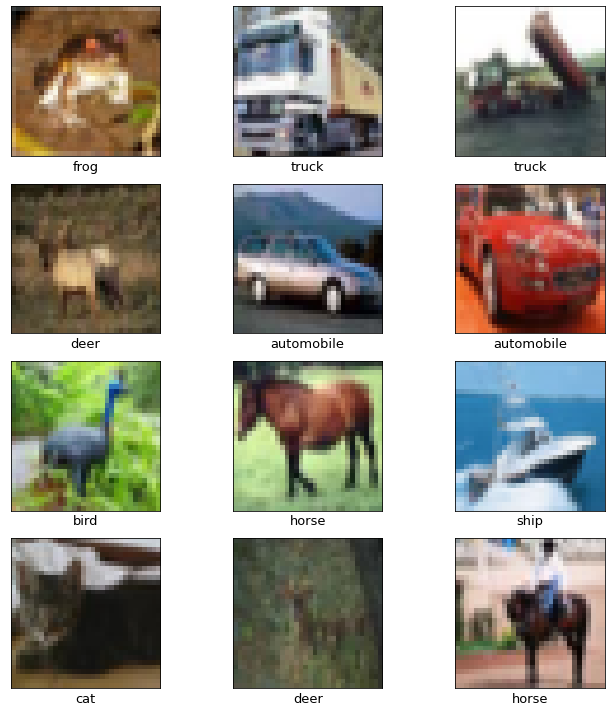

In [ ]:
class_types = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck'] # from cifar-10 website

plt.figure(figsize=(10,10))
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_im[i], cmap='gray')
    plt.xlabel(class_types[train_lab[i][0]], fontsize=13)
plt.tight_layout()    
plt.show()

In [ ]:
### One hot encoding for labels 

train_lab_categorical = tf.keras.utils.to_categorical(
    train_lab, num_classes=10, dtype='uint8')

test_lab_categorical = tf.keras.utils.to_categorical(
    test_lab, num_classes=10, dtype='uint8')

In [ ]:
### Train -test split 

from sklearn.model_selection import train_test_split 
train_im, valid_im, train_lab, valid_lab = train_test_split(train_im, train_lab_categorical, test_size=0.20, 
                                                            stratify=train_lab_categorical, 
                                                            random_state=40, shuffle = True)

print ("train data shape after the split: ", train_im.shape)
print ('new validation data shape: ', valid_im.shape)
print ("validation labels shape: ", valid_lab.shape)

train data shape after the split:  (40000, 32, 32, 3)
new validation data shape:  (10000, 32, 32, 3)
validation labels shape:  (10000, 10)


In [ ]:
#### Necessary Imports for Neural Net 

from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, ZeroPadding2D,\
     Flatten, BatchNormalization, AveragePooling2D, Dense, Activation, Add 
from tensorflow.keras.models import Model
from tensorflow.keras import activations
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [ ]:
##### Include Little Data Augmentation 
batch_size = 64 # try several values

train_DataGen = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=0.2, 
                                                                width_shift_range=0.1, 
                                                                height_shift_range = 0.1, 
                                                                horizontal_flip=True)
 
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator()

train_set_conv = train_DataGen.flow(train_im, train_lab, batch_size=batch_size) # train_lab is categorical 
valid_set_conv = valid_datagen.flow(valid_im, valid_lab, batch_size=batch_size) # so as valid_lab 

In [ ]:
def res_identity(x, filters): 
  ''' renet block where dimension doesnot change.
  The skip connection is just simple identity conncection
  we will have 3 blocks and then input will be added
  '''
  x_skip = x # this will be used for addition with the residual block 
  f1, f2 = filters

  #first block 
  x = Conv2D(f1, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=l2(0.001))(x)
  x = BatchNormalization()(x)
  x = Activation(activations.relu)(x)

  #second block # bottleneck (but size kept same with padding)
  x = Conv2D(f1, kernel_size=(3, 3), strides=(1, 1), padding='same', kernel_regularizer=l2(0.001))(x)
  x = BatchNormalization()(x)
  x = Activation(activations.relu)(x)

  # third block activation used after adding the input
  x = Conv2D(f2, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=l2(0.001))(x)
  x = BatchNormalization()(x)
  # x = Activation(activations.relu)(x)

  # add the input 
  x = Add()([x, x_skip])
  x = Activation(activations.relu)(x)

  return x

In [ ]:
def res_conv(x, s, filters):
  '''
  here the input size changes, when it goes via conv blocks
  so the skip connection uses a projection (conv layer) matrix
  ''' 
  x_skip = x
  f1, f2 = filters

  # first block
  x = Conv2D(f1, kernel_size=(1, 1), strides=(s, s), padding='valid', kernel_regularizer=l2(0.001))(x)
  # when s = 2 then it is like downsizing the feature map
  x = BatchNormalization()(x)
  x = Activation(activations.relu)(x)

  # second block
  x = Conv2D(f1, kernel_size=(3, 3), strides=(1, 1), padding='same', kernel_regularizer=l2(0.001))(x)
  x = BatchNormalization()(x)
  x = Activation(activations.relu)(x)

  #third block
  x = Conv2D(f2, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=l2(0.001))(x)
  x = BatchNormalization()(x)

  # shortcut 
  x_skip = Conv2D(f2, kernel_size=(1, 1), strides=(s, s), padding='valid', kernel_regularizer=l2(0.001))(x_skip)
  x_skip = BatchNormalization()(x_skip)

  # add 
  x = Add()([x, x_skip])
  x = Activation(activations.relu)(x)

  return x

In [ ]:
### Combine the above functions to build 50 layers resnet. 
def resnet50():

  input_im = Input(shape=(train_im.shape[1], train_im.shape[2], train_im.shape[3])) # cifar 10 images size
  x = ZeroPadding2D(padding=(3, 3))(input_im)

  # 1st stage
  # here we perform maxpooling, see the figure above

  x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2))(x)
  x = BatchNormalization()(x)
  x = Activation(activations.relu)(x)
  x = MaxPooling2D((3, 3), strides=(2, 2))(x)

  #2nd stage 
  # frm here on only conv block and identity block, no pooling

  x = res_conv(x, s=1, filters=(64, 256))
  x = res_identity(x, filters=(64, 256))
  x = res_identity(x, filters=(64, 256))

  # 3rd stage

  x = res_conv(x, s=2, filters=(128, 512))
  x = res_identity(x, filters=(128, 512))
  x = res_identity(x, filters=(128, 512))
  x = res_identity(x, filters=(128, 512))

  # 4th stage

  x = res_conv(x, s=2, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))

  # 5th stage

  x = res_conv(x, s=2, filters=(512, 2048))
  x = res_identity(x, filters=(512, 2048))
  x = res_identity(x, filters=(512, 2048))

  # ends with average pooling and dense connection

  x = AveragePooling2D((2, 2), padding='same')(x)

  x = Flatten()(x)
  x = Dense(len(class_types), activation='softmax', kernel_initializer='he_normal')(x) #multi-class

  # define the model 

  model = Model(inputs=input_im, outputs=x, name='Resnet50')

  return model

In [ ]:
### Define some Callbacks
def lrdecay(epoch):
    lr = 1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    #print('Learning rate: ', lr)
    return lr
  # if epoch < 40:
  #   return 0.01
  # else:
  #   return 0.01 * np.math.exp(0.03 * (40 - epoch))
lrdecay = tf.keras.callbacks.LearningRateScheduler(lrdecay) # learning rate decay  


def earlystop(mode):
  if mode=='acc':
    estop = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=15, mode='max')
  elif mode=='loss':
    estop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, mode='min')
  return estop    

In [ ]:
resnet50_model = resnet50()

In [ ]:
resnet50_model.summary()

Model: "Resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 38, 38, 3)   0           ['input_4[0][0]']                
                                                                                                  
 conv2d_98 (Conv2D)             (None, 16, 16, 64)   9472        ['zero_padding2d[0][0]']         
                                                                                                  
 batch_normalization_30 (BatchN  (None, 16, 16, 64)  256         ['conv2d_98[0][0]']              
 ormalization)                                                                             

In [ ]:
resnet50_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-3), 
                       metrics=['acc'])

In [ ]:
batch_size=batch_size # test with 64, 128, 256

resnet_train = resnet50_model.fit(train_set_conv, 
                                  epochs=160, 
                                  steps_per_epoch=train_im.shape[0]/batch_size, 
                                  validation_steps=valid_im.shape[0]/batch_size, 
                                  validation_data=valid_set_conv, 
                                  callbacks=[lrdecay])

Epoch 1/160
625/625 [==============================] - 35s 44ms/step - loss: 14.7500 - acc: 0.3434 - val_loss: 10.4654 - val_acc: 0.2969 - lr: 0.0010
Epoch 2/160
625/625 [==============================] - 23s 37ms/step - loss: 7.9251 - acc: 0.3971 - val_loss: 6.2051 - val_acc: 0.3164 - lr: 0.0010
Epoch 3/160
625/625 [==============================] - 23s 37ms/step - loss: 5.6071 - acc: 0.3494 - val_loss: 4.8636 - val_acc: 0.3141 - lr: 0.0010
Epoch 4/160
625/625 [==============================] - 23s 37ms/step - loss: 4.4147 - acc: 0.4119 - val_loss: 4.1137 - val_acc: 0.3325 - lr: 0.0010
Epoch 5/160
625/625 [==============================] - 23s 36ms/step - loss: 4.1214 - acc: 0.3407 - val_loss: 3.6307 - val_acc: 0.3287 - lr: 0.0010
Epoch 6/160
625/625 [==============================] - 23s 36ms/step - loss: 3.7638 - acc: 0.3582 - val_loss: 18.1377 - val_acc: 0.1004 - lr: 0.0010
Epoch 7/160
625/625 [==============================] - 23s 37ms/step - loss: 3.6872 - acc: 0.3543 - val_loss:

FileNotFoundError: ignored

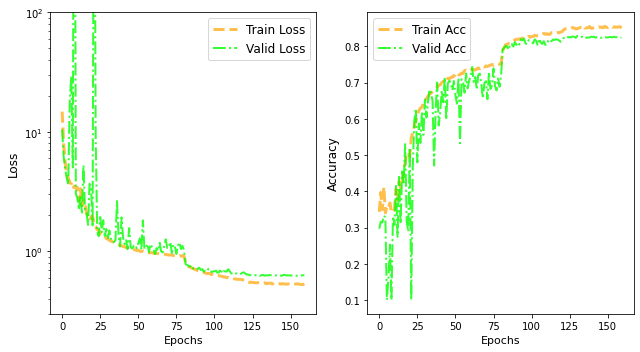

In [ ]:
### Plot train and validation curves
loss = resnet_train.history['loss']
v_loss = resnet_train.history['val_loss']

acc = resnet_train.history['acc']
v_acc = resnet_train.history['val_acc']

epochs = range(len(loss))

fig = plt.figure(figsize=(9, 5))
plt.subplot(1, 2, 1)
plt.yscale('log')
plt.plot(epochs, loss, linestyle='--', linewidth=3, color='orange', alpha=0.7, label='Train Loss')
plt.plot(epochs, v_loss, linestyle='-.', linewidth=2, color='lime', alpha=0.8, label='Valid Loss')
plt.ylim(0.3, 100)
plt.xlabel('Epochs', fontsize=11)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=12)
plt.subplot(1, 2, 2)
plt.plot(epochs, acc, linestyle='--', linewidth=3, color='orange', alpha=0.7, label='Train Acc')
plt.plot(epochs, v_acc, linestyle='-.', linewidth=2, color='lime', alpha=0.8, label='Valid Acc') 
plt.xlabel('Epochs', fontsize=11)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('/content/gdrive/My Drive/Colab Notebooks/resnet/train_acc.png', dpi=250)
plt.show()

In [ ]:
#### Plot the Confusion Matrix

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def conf_matrix(predictions): 
    ''' Plots conf. matrix and classification report '''
    cm=confusion_matrix(test_lab, np.argmax(np.round(predictions), axis=1))
    print("Classification Report:\n")
    cr=classification_report(test_lab,
                                np.argmax(np.round(predictions), axis=1), 
                                target_names=[class_types[i] for i in range(len(class_types))])
    print(cr)
    plt.figure(figsize=(12,12))
    sns_hmp = sns.heatmap(cm, annot=True, xticklabels = [class_types[i] for i in range(len(class_types))], 
                yticklabels = [class_types[i] for i in range(len(class_types))], fmt="d")
    fig = sns_hmp.get_figure()
    fig.savefig('/content/gdrive/My Drive/Colab Notebooks/resnet/heatmap.png', dpi=250)

In [ ]:
pred_class_resnet50 = resnet50_model.predict(test_im)

conf_matrix(pred_class_resnet50)

In [ ]:
### Resutls on Test Data; 
## Check the performance on the test data 
test_result = resnet50_model.evaluate(test_im, test_lab_categorical, verbose=0)

print ("ResNet50 loss: ", test_result[0])
print ("ResNet50 accuracy: ", test_result[1])

In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt
###################keras model##############################################
from keras.layers import Dense, Conv2D,BatchNormalization, Activation
from keras.layers import MaxPool2D, AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing import image_dataset_from_directory 
from keras.regularizers import l2
from keras.models import Model
import tensorflow as tf

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [ ]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
epochs = 10
batch_size = 100
data_augemenation = False
img_size = 28

num_classes = 10
num_filters = 64
num_blocks = 4
num_sub_blocks = 2
use_max_pool = False

In [ ]:
import tensorflow as tf
#Converting labels to ont-hot vectors
y_train = tf.keras.utils.to_categorical(y_train,num_classes)
y_test = tf.keras.utils.to_categorical(y_test,num_classes )

In [ ]:
#modeling

inputs = Input(shape =(28,28,1))
x = Conv2D(num_filters, padding = 'same', kernel_initializer = 'he_normal', kernel_size=7, strides = 2,
           kernel_regularizer = l2(1e-4))(inputs)

x = BatchNormalization()(x)
x = Activation('relu')(x)

if use_max_pool:
  x = MaxPool2D(pool_size=3, padding = 'same', stride = 2)(x)
  num_blocks = 3

# CNN Resnet
for i in range(num_blocks):
  for j in range(num_sub_blocks):
    strides = 1
    is_first_layer_but_not_first_block=j==0 and i>0
    if is_first_layer_but_not_first_block:
      strides = 2
    # Residual block
    y = Conv2D(num_filters,
               kernel_size = 3, 
               padding = 'same', 
               strides = strides,
               kernel_initializer = 'he_normal',
              kernel_regularizer = l2(1e-4))(x)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = Conv2D(num_filters,
               kernel_size = 3, 
               padding = 'same', 
               kernel_initializer = 'he_normal',
               kernel_regularizer= l2(1e-4))(y)
    y = BatchNormalization()(y)
    if is_first_layer_but_not_first_block:
      x =  Conv2D(num_filters,
               kernel_size = 3, 
               padding = 'same', 
               strides = 2,
               kernel_initializer = 'he_normal',
               kernel_regularizer= l2(1e-4))(x)
    
    x = keras.layers.add([x,y])
    x = Activation('relu')(x)

  num_filter = 2 * num_filters

#classifier 
x = AveragePooling2D()(x)
y = Flatten()(x)

outputs = Dense(num_classes, activation='softmax', kernel_initializer='he_normal')(y)

model = Model(inputs = inputs, outputs = outputs)
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(),
              metrics = ['acc'])
model.summary()

      


In [ ]:
import os
save_dir = os.path.join(os.getcwd(),'save_model')
model_name = 'fmnist_resnt_model.h5'
if not os.path.join(save_dir):
  os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)
print(filepath)

In [ ]:
checkpoint = ModelCheckpoint(filepath=filepath,
                             verbose = 1,
                             save_best_only = True)
callbacks = [checkpoint]

In [ ]:
model.fit(x_train,y_train, 
          batch_size = batch_size,
          epochs = epochs,
          validation_data = (x_test,y_test),
          shuffle = True,
          callbacks = callbacks)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Cats and dogs kaggle dataset(https://www.kaggle.com/c/dogs-vs-cats)

In [ ]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json
# 본인이 참가한 모든 대회 보기 
!kaggle competitions list

In [ ]:
!kaggle competitions download -c dogs-vs-cats

In [ ]:
import numpy as np
import pandas as pd
import zipfile
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf  

from sklearn.model_selection import train_test_split
from keras.preprocessing.image  import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.applications.resnet50 import preprocess_input

1. Extracting Zip file

In [ ]:
zip_file = glob.glob('/content/*.zip')
print(zip_file)

In [ ]:
def extract_zip(file):
  with zipfile.ZipFile(file,'r') as zip_ref:
    zip_ref.extractall('temp')

#extract train and test
for files in zip_file:
  extract_zip(files)

In [ ]:
batch_size = 16
img_size = 224
epochs = 30

In [ ]:
print(len(os.listdir('/content/temp/train')), 'training data') 
print(len(os.listdir('/content/temp/test1')), 'test data')
os.listdir('/content/temp/')

1-2. Data Formatting

In [ ]:
def gen_label(directory):
  label = []
  for file in os.listdir(directory):
    if (file.split('.')[0] == 'dog'):
      label.append(str(1))
    elif (file.split('.')[0] =='cat'):
      label.append(str(0))
  return label
def gen_path(directory):
  path = []
  for files in os.listdir(directory):
    path.append(files)
  return path

y_train = gen_label('/content/temp/train')
X_train = gen_path('/content/temp/train')
X_test = gen_path('/content/temp/test1')

In [ ]:
df = pd.DataFrame({'filename' : X_train,'category':y_train})

print(df.head())

In [ ]:
sns.countplot(x = 'category', data = df).set_title('Data Distribution')

In [ ]:
os.chdir('/content/temp/train')

img = load_img(df['filename'].iloc[600])

plt.figure(figsize=(8,8))
plt.imshow(img)

In [ ]:
df_train,df_valid = train_test_split(df, test_size = 0.25)
print(df_train.shape)
print(df_valid.shape)

In [ ]:
def generate_train_batch(model):
  if model == 'resnet':
    print('resnet data')  # Specific preprossing method
    train_datagen = ImageDataGenerator(
        rotation_range = 10,
        zoom_range = 0.1,
        horizontal_flip = True,
        fill_mode = 'nearest',
        width_shift_range = 0.1,
        height_shift_range = 0.1,
        preprocess_function = preprocess_input) #preprocess_input : 단일 이미지를 로드하면 하나의 이미지 모양인(size1,size2,channel)를 얻게됨.
        # 이미지 배치를 생성하려면 추가 자원이 필요함-> (sample,size1,size2, channels) / preprcess_input 함수는 모델에 필요한 형식에
        # 이미지를 적절하게 맞추기 위한 것.
  else :  # standard Augmenatation.
    train_datagen = ImageDataGenerator(
        rotation_range = 10,
        rescale = 1./255,
        zoom_range = 0.1,
        horizontal_flip = True,
        fill_mode = 'nearest',
        width_shift_range = 0.1,
        height_shift_range = 0.1)
  if model =='vgg':
    print('vgg data') 
    train_gen = train_datagen.flow_from_dataframe(
        df_train[['filename']],
        x_col = 'filename',
        y_col = None,
        target_size = (img_size, img_size), # 224x224
        class_mode = None,
        shuffle = False
    )
  else : 
    train_gen = train_datagen.flow_from_dataframe(
        df_train,
        x_col = 'filename',
        y_col = 'category',
        target_size = (img_size, img_size), # 224x224
        class_mode = 'binary'
    )
  return train_gen  

def generate_valid_batch(model):
  if model =='resnet':
    print('resnet validation set')
    valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
  else:
    valid_datagen = ImageDataGenerator(rescale=1./255)


  valid_gen = valid_datagen.flow_from_dataframe(
      df_valid,
      x_col = 'filename',
      y_col = 'category',
      target_size = (img_size, img_size),
      batch_size = batch_size,
      class_mode = 'binary'
  )

  return valid_gen  

In [ ]:
train_gen = generate_train_batch('others')
valid_gen = generate_valid_batch('others')

## Data Augmentation

In [ ]:
#standard
visual_datagen = ImageDataGenerator(
    rotation_range = 10,
    rescale = 1./255,
    zoom_range = 0.1,
    horizontal_flip = True,
    fill_mode = 'nearest',
    width_shift_range = 0.1,
    height_shift_range = 0.1)

In [ ]:
visualise_df = df_train.sample(n=1).reset_index(drop = True)

visualisation_generator = visual_datagen.flow_from_dataframe(
    visualise_df,
    x_col = 'filename',
    y_col = 'category' 
)
plt.figure(figsize = (8,8))
for i in range(0,9):
  plt.subplot(3,3, i+1)
  for X_batch, y_batch in visualisation_generator:
    image = X_batch[0]
    plt.imshow(image)
    break
plt.tight_layout()
plt.show()

# CNN Architecture

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.layers import *
from keras.models import Model, Sequential
from keras import optimizers,regularizers
from keras import backend as K
import tensorflow as tf

In [ ]:
modelcnn = Sequential()
modelcnn.add(Conv2D(16,(3,3), activation= 'relu', input_shape = (img_size,img_size,3)))
modelcnn.add(Conv2D(16,(3,3),activation = 'relu'))
modelcnn.add(MaxPool2D(2,2))


modelcnn.add(Conv2D(32,(3,3), activation= 'relu'))
modelcnn.add(Conv2D(32,(3,3),activation = 'relu'))
modelcnn.add(MaxPool2D(2,2))


modelcnn.add(Conv2D(64,(3,3), activation= 'relu'))
modelcnn.add(Conv2D(64,(3,3),activation = 'relu'))
modelcnn.add(MaxPool2D(2,2))
modelcnn.add(Dropout(0.2))

modelcnn.add(Conv2D(64,(3,3), activation= 'relu'))
modelcnn.add(MaxPool2D(2,2))

modelcnn.add(Flatten())
modelcnn.add(Dense(512, activation='relu'))
modelcnn.add(Dropout(0.5))
modelcnn.add(Dense(1, activation='sigmoid'))


modelcnn.compile(loss = tf.keras.losses.binary_crossentropy,
                 optimizer = optimizers.Adam(),
                 metrics = ['acc'])
modelcnn.summary()

In [ ]:
modelcnn.fit_generator(train_gen,
                       epochs = epochs,
                       validation_data = valid_gen)

# Transfer learning

전이 학습-> pretrained model 

In [ ]:
vgg = VGG16(weights = 'imagenet',
            include_top = False,
            input_shape = (224,224,3))
for layers in vgg.layers:
  layers.trainable = False

h5 file ->pretrain model 

imagenet ->class 1000개 이미지를 학습한 weight ->.h5

In [ ]:
feature_list = []
for path in df_train['filename'].to_numpy():
  x = load_img(path,target_size = (img_size,img_size))
  img_array = img_to_array(x)
  img_array = np.expand_dims(img_array,axis =0)
  features = vgg.predict(img_array)
  feature_list.append(features)

feat_lst = np.reshape(feature_list, (-1,7*7*512))

In [ ]:
del feature_list

## Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

y = df_train['category'].to_numpy()

X_train,X_test,y_train,y_test = train_test_split(feat_lst, y, test_size = 0.2, random_state = 42)

glm = LogisticRegression(C=0.1)
glm.fit(X_train,y_train)

# Fine Turning-> Resnet +fully Connected

In [ ]:
np.random.seed(2020)

res = ResNet50(weights = 'imagenet',
                      include_top = False,
                      input_shape = (224,224,3))
res_train_gen = generate_train_batch('resnet')
res_valid_gen = generate_valid_batch('resnet')


for layer in res.layer[:171]:
  layer.trainable = False


flat = Flatten()(res.output)
dense = Dense91024,activation = 'relu')(falt)
drop  = Dropout(0.5)(dense)
classifier = Dense(1, activation = 'sigmoid')(drop)

res_model = Model(res.input, classifier)
res_model.compile(loss = tf.keras.losses.binary_crossentropy,
                 optimizer = optimizers.Adam(),
                 metrics = ['acc'])
res_model.summary()

In [ ]:
modelcnn.fit_generator(res_train_gen,
                       epochs = epochs,
                       validation_data = res_valid_gen,
                       validation_steps = res_train_gen.samples // batch_size,
                       step_per_epoch = res_valid_gen.samples // batch_size)

In [ ]:
testdf = pd.DataFrame({'filename':X_test})
test_sample = testdf.sample(n=12, random_state = 2021)

def test_img(model,name):
  result_lst = []
  for path in test_sample['fliename'].to_numpy():
    full_path = '/content/temp/test1'+path
    x = load_img(full_path, target_size = (224,224))
    img_array = img_to_array(x)
    img_array = np.exapan_dims(img_array,axis =0)

    if name =='vgg':
      features = model.predict(img_array)
      features = np.reshape(features, (-1,7*7*512))
      result = glm.predict(features)
    else:
      result = model.predict(img_array)
    
    result = 'dog' if float(result) > 0.5 else 'cat'

    result_lst.append(result)

  return result_lst

In [ ]:
custom_cnn_result = test_img(modecnn,'cnn')
vgg_result = test_img(vgg,'VGG')
finetune_result = test_img(res_model, 'resnet')

## Neural Style Transfer로 알려져있으며, Leon A. Gatys의 논문 A Neural Algorithm of Artistic Style에 있습니다.

Neural style transfer은 콘텐츠 (content) 이미지와 (유명한 작가의 삽화와 같은) 스타일 참조 (style reference) 이미지를 이용하여, 콘텐츠 이미지의 콘텐츠는 유지하되 스타일 참조 이미지의 화풍으로 채색한 것 같은 새로운 이미지를 생성하는 최적화 기술입니다.

이 과정은 출력 이미지를 콘텐츠 이미지의 콘텐츠 통계랑(statistic)과 스타일 참조 이미지의 스타일 통계량에 맞춰 최적화시킴으로써 구현됩니다. 통계량은 합성곱 신경망을 이용해 각각의 이미지에서 추출합니다.

예시로, 아래에 주어진 강아지의 이미지와 바실리 칸딘스키의 7번 작품을 살펴봅시다:

<img src = 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg'>

<img src = 'https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg'>

만약 칸딘스키가 7번 작품의 화풍으로 이 강아지를 그렸다면 어떤 작품이 탄생했을까요? 아마 이런 그림이 아니었을까요?

<img src = 'https://tensorflow.org/tutorials/generative/images/stylized-image.png?hl=ko'>

#import

In [ ]:
import tensorflow as tf

In [ ]:
import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image
import time
import functools

In [ ]:
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

In [ ]:
content_path = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')

# https://commons.wikimedia.org/wiki/File:Vassily_Kandinsky,_1913_-_Composition_7.jpg
style_path = tf.keras.utils.get_file('kandinsky5.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')

입력 시각화


이미지를 불러오는 함수를 정의하고, 최대 이미지 크기를 512개의 픽셀로 제한합니다.

In [ ]:
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

이미지를 출력하기 위한 간단한 함수를 정의합니다:

In [ ]:
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

In [ ]:
content_image = load_img(content_path)
style_image = load_img(style_path)

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

TF-Hub를 통한 빠른 스타일 전이


앞서 언급했듯이, 본 튜토리얼은 이미지 콘텐츠를 특정 스타일에 맞춰 최적화시키는 기존의 스타일 전이 알고리즘을 소개합니다. 이에 대해 살펴보기 전에, 텐서플로 허브 모듈은 어떤 결과물을 생성하는지 시험해봅시다:

In [ ]:
import tensorflow_hub as hub
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/1')
stylized_image = hub_module(tf.constant(content_image), tf.constant(style_image))[0]
tensor_to_image(stylized_image)

콘텐츠와 스타일 표현 정의하기



이미지의 콘텐츠와 스타일 표현(representation)을 얻기 위해, 모델의 몇 가지 중간층들을 살펴볼 것입니다. 모델의 입력층부터 시작해서, 처음 몇 개의 층은 선분이나 질감과 같은 이미지 내의 저차원적 특성에 반응합니다. 반면, 네트워크가 깊어지면 최종 몇 개의 층은 바퀴나 눈과 같은 고차원적 특성들을 나타냅니다. 이번 경우, 우리는 사전학습된 이미지 분류 네트워크인 VGG19 네트워크의 구조를 사용할 것입니다. 이 중간층들은 이미지에서 콘텐츠와 스타일 표현을 정의하는 데 필요합니다. 입력 이미지가 주어졌을때, 스타일 전이 알고리즘은 이 중간층들에서 콘텐츠와 스타일에 해당하는 타깃 표현들을 일치시키려고 시도할 것입니다.

VGG19 모델을 불러오고, 작동 여부를 확인하기 위해 이미지에 적용시켜봅시다:

In [ ]:
x = tf.keras.applications.vgg19.preprocess_input(content_image*255)
x = tf.image.resize(x, (224, 224))
vgg = tf.keras.applications.VGG19(include_top=True, weights='imagenet')
prediction_probabilities = vgg(x)
prediction_probabilities.shape

In [ ]:
predicted_top_5 = tf.keras.applications.vgg19.decode_predictions(prediction_probabilities.numpy())[0]
[(class_name, prob) for (number, class_name, prob) in predicted_top_5]

이제 분류층을 제외한 VGG19 모델을 불러오고, 각 층의 이름을 출력해봅니다.

In [ ]:
vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')

print()
for layer in vgg.layers:
  print(layer.name)

이미지의 스타일과 콘텐츠를 나타내기 위한 모델의 중간층들을 선택합니다:

In [ ]:
content_layers = ['block5_conv2'] 

style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1', 
                'block4_conv1', 
                'block5_conv1']

num_content_layers = len(content_layers)
num_style_layers = len(style_layers)

## 스타일과 콘텐츠를 위한 중간층

그렇다면 사전훈련된 이미지 분류 네트워크 속에 있는 중간 출력으로 어떻게 스타일과 콘텐츠 표현을 정의할 수 있을까요?

고수준에서 보면 (네트워크의 훈련 목적인) 이미지 분류를 수행하기 위해서는 네트워크가 반드시 이미지를 이해햐야 합니다. 이는 미가공 이미지를 입력으로 받아 픽셀값들을 이미지 내에 존재하는 특성(feature)들에 대한 복합적인 이해로 변환할 수 있는 내부 표현(internal representation)을 만드는 작업이 포함됩니다.

또한 부분적으로 왜 합성곱(convolutional) 신경망의 일반화(generalize)가 쉽게 가능한지를 나타냅니다. 즉, 합성곱 신경망은 배경잡음(background noise)과 기타잡음(nuisances)에 상관없이 (고양이와 강아지와 같이)클래스 안에 있는 불변성(invariance)과 특징을 포착할 수 있습니다. 따라서 미가공 이미지의 입력과 분류 레이블(label)의 출력 중간 어딘가에서 모델은 복합 특성(complex feature) 추출기의 역할을 수행합니다. 그러므로, 모델의 중간층에 접근함으로써 입력 이미지의 콘텐츠와 스타일을 추출할 수 있습니다.

## 모델 만들기

tf.keras.applications에서 제공하는 모델들은 케라스 함수형 API을 통해 중간층에 쉽게 접근할 수 있도록 구성되어있습니다.

함수형 API를 이용해 모델을 정의하기 위해서는 모델의 입력과 출력을 지정합니다:

model = Model(inputs, outputs)

아래의 함수는 중간층들의 결과물을 배열 형태로 출력하는 VGG19 모델을 반환합니다:

In [ ]:
def vgg_layers(layer_names):
  """ 중간층의 출력값을 배열로 반환하는 vgg 모델을 만듭니다."""
  # 이미지넷 데이터셋에 사전학습된 VGG 모델을 불러옵니다
  vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
  vgg.trainable = False

  outputs = [vgg.get_layer(name).output for name in layer_names]

  model = tf.keras.Model([vgg.input], outputs)
  return model

위 함수를 이용해 모델을 만들어봅시다:

In [ ]:
style_extractor = vgg_layers(style_layers)
style_outputs = style_extractor(style_image*255)

# 각 층의 출력에 대한 통계량을 살펴봅니다
for name, output in zip(style_layers, style_outputs):
  print(name)
  print("  크기: ", output.numpy().shape)
  print("  최솟값: ", output.numpy().min())
  print("  최댓값: ", output.numpy().max())
  print("  평균: ", output.numpy().mean())
  print()

##스타일 계산하기


이미지의 콘텐츠는 중간층들의 특성 맵(feature map)의 값들로 표현됩니다.

이미지의 스타일은 각 특성 맵의 평균과 피쳐맵들 사이의 상관관계로 설명할 수 있습니다. 이런 정보를 담고 있는 그람 행렬(Gram matrix)은 각 위치에서 특성 벡터(feature vector)끼리의 외적을 구한 후,평균값을 냄으로써 구할 수 있습니다. 주어진 층에 대한 그람 행렬은 다음과 같이 계산할 수 있습니다:

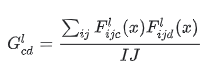

이 식은 tf.linalg.einsum 함수를 통해 쉽게 계산할 수 있습니다:

In [ ]:
def gram_matrix(input_tensor):
  result = tf.linalg.einsum('bijc,bijd->bcd', input_tensor, input_tensor)
  input_shape = tf.shape(input_tensor)
  num_locations = tf.cast(input_shape[1]*input_shape[2], tf.float32)
  return result/(num_locations)

## 스타일과 콘텐츠 추출하기

스타일과 콘텐츠 텐서를 반환하는 모델을 만듭시다.

In [ ]:
class StyleContentModel(tf.keras.models.Model):
  def __init__(self, style_layers, content_layers):
    super(StyleContentModel, self).__init__()
    self.vgg =  vgg_layers(style_layers + content_layers)
    self.style_layers = style_layers
    self.content_layers = content_layers
    self.num_style_layers = len(style_layers)
    self.vgg.trainable = False

  def call(self, inputs):
    "[0,1] 사이의 실수 값을 입력으로 받습니다"
    inputs = inputs*255.0
    preprocessed_input = tf.keras.applications.vgg19.preprocess_input(inputs)
    outputs = self.vgg(preprocessed_input)
    style_outputs, content_outputs = (outputs[:self.num_style_layers], 
                                      outputs[self.num_style_layers:])

    style_outputs = [gram_matrix(style_output)
                     for style_output in style_outputs]

    content_dict = {content_name:value 
                    for content_name, value 
                    in zip(self.content_layers, content_outputs)}

    style_dict = {style_name:value
                  for style_name, value
                  in zip(self.style_layers, style_outputs)}

    return {'content':content_dict, 'style':style_dict}

이미지가 입력으로 주어졌을때, 이 모델은 style_layers의 스타일과 content_layers의 콘텐츠에 대한 그람 행렬을 출력합니다:

In [ ]:
extractor = StyleContentModel(style_layers, content_layers)

results = extractor(tf.constant(content_image))

print('스타일:')
for name, output in sorted(results['style'].items()):
  print("  ", name)
  print("    크기: ", output.numpy().shape)
  print("    최솟값: ", output.numpy().min())
  print("    최댓값: ", output.numpy().max())
  print("    평균: ", output.numpy().mean())
  print()

print("콘텐츠:")
for name, output in sorted(results['content'].items()):
  print("  ", name)
  print("    크기: ", output.numpy().shape)
  print("    최솟값: ", output.numpy().min())
  print("    최댓값: ", output.numpy().max())
  print("    평균: ", output.numpy().mean())

최적화를 진행하기 위해, 전체 오차를 콘텐츠와 스타일 오차의 가중합으로 정의합니다:

## 경사하강법 실행

이제 스타일과 콘텐츠 추출기를 사용해 스타일 전이 알고리즘을 구현할 차례입니다. 타깃에 대한 입력 이미지의 평균 제곱 오차를 계산한 후, 오차값들의 가중합을 구합니다.

스타일과 콘텐츠의 타깃값을 지정합니다:

In [ ]:
style_targets = extractor(style_image)['style']
content_targets = extractor(content_image)['content']

최적화시킬 이미지를 담을 tf.Variable을 정의하고 콘텐츠 이미지로 초기화합니다. (이때 tf.Variable는 콘텐츠 이미지와 크기가 같아야 합니다.):

In [ ]:
image = tf.Variable(content_image)

픽셀 값이 실수이므로 0과 1 사이로 클리핑하는 함수를 정의합니다:

In [ ]:
def clip_0_1(image):
  return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)

옵티마이저를 생성합니다. 참조 연구에서는 LBFGS를 추천하지만, Adam도 충분히 적합합니다:

In [ ]:
opt = tf.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)

최적화를 진행하기 위해, 전체 오차를 콘텐츠와 스타일 오차의 가중합으로 정의합니다:

In [ ]:
style_weight=1e-2
content_weight=1e4

In [ ]:
def style_content_loss(outputs):
    style_outputs = outputs['style']
    content_outputs = outputs['content']
    style_loss = tf.add_n([tf.reduce_mean((style_outputs[name]-style_targets[name])**2) 
                           for name in style_outputs.keys()])
    style_loss *= style_weight / num_style_layers

    content_loss = tf.add_n([tf.reduce_mean((content_outputs[name]-content_targets[name])**2) 
                             for name in content_outputs.keys()])
    content_loss *= content_weight / num_content_layers
    loss = style_loss + content_loss
    return loss

tf.GradientTape를 사용해 이미지를 업데이트합니다.

In [ ]:
@tf.function() 
def train_step(image):
  with tf.GradientTape() as tape:
    outputs = extractor(image)
    loss = style_content_loss(outputs)

  grad = tape.gradient(loss, image)
  opt.apply_gradients([(grad, image)])
  image.assign(clip_0_1(image))

구현한 알고리즘을 시험해보기 위해 몇 단계를 돌려봅시다:

In [ ]:
train_step(image)
train_step(image)
train_step(image)
tensor_to_image(image)

잘 작동하는 것을 확인했으니, 더 오랫동안 최적화를 진행해봅니다:

In [ ]:
import time
start = time.time()

epochs = 10
steps_per_epoch = 100

step = 0
for n in range(epochs):
  for m in range(steps_per_epoch):
    step += 1
    train_step(image)
    print(".", end='')
  display.clear_output(wait=True)
  display.display(tensor_to_image(image))
  print("훈련 스텝: {}".format(step))

end = time.time()
print("전체 소요 시간: {:.1f}".format(end-start))

## 총 변위 손실


이 기본 구현 방식의 한 가지 단점은 많은 고주파 아티팩(high frequency artifact)가 생겨난다는 점 입니다. 아티팩 생성을 줄이기 위해서는 이미지의 고주파 구성 요소에 대한 레귤러리제이션(regularization) 항을 추가해야 합니다. 스타일 전이에서는 이 변형된 오차값을 총 변위 손실(total variation loss)라고 합니다:

In [ ]:
def high_pass_x_y(image):
  x_var = image[:,:,1:,:] - image[:,:,:-1,:]
  y_var = image[:,1:,:,:] - image[:,:-1,:,:]

  return x_var, y_var

In [ ]:
x_deltas, y_deltas = high_pass_x_y(content_image)

plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
imshow(clip_0_1(2*y_deltas+0.5), "Horizontal Deltas: Original")

plt.subplot(2,2,2)
imshow(clip_0_1(2*x_deltas+0.5), "Vertical Deltas: Original")

x_deltas, y_deltas = high_pass_x_y(image)

plt.subplot(2,2,3)
imshow(clip_0_1(2*y_deltas+0.5), "Horizontal Deltas: Styled")

plt.subplot(2,2,4)
imshow(clip_0_1(2*x_deltas+0.5), "Vertical Deltas: Styled")

위 이미지들은 고주파 구성 요소가 늘어났다는 것을 보여줍니다.

한 가지 흥미로운 사실은 고주파 구성 요소가 경계선 탐지기의 일종이라는 점입니다. 이를테면 소벨 경계선 탐지기(Sobel edge detector)를 사용하면 유사한 출력을 얻을 수 있습니다:

In [ ]:
plt.figure(figsize=(14,10))

sobel = tf.image.sobel_edges(content_image)
plt.subplot(1,2,1)
imshow(clip_0_1(sobel[...,0]/4+0.5), "Horizontal Sobel-edges")
plt.subplot(1,2,2)
imshow(clip_0_1(sobel[...,1]/4+0.5), "Vertical Sobel-edges")

정규화 오차는 각 값의 절대값의 합으로 표현됩니다:

In [ ]:
def total_variation_loss(image):
  x_deltas, y_deltas = high_pass_x_y(image)
  return tf.reduce_sum(tf.abs(x_deltas)) + tf.reduce_sum(tf.abs(y_deltas))

In [ ]:
total_variation_loss(image).numpy()

식이 잘 계산된다는 것을 확인할 수 있습니다. 하지만 다행히도 텐서플로에는 이미 표준 함수가 내장되어 있기 직접 오차식을 구현할 필요는 없습니다:

In [ ]:
tf.image.total_variation(image).numpy()

다시 최적화하기
total_variation_loss를 위한 가중치를 정의합니다:

In [ ]:
total_variation_weight=30

이제 이 가중치를 train_step 함수에서 사용합니다:

In [ ]:
@tf.function()
def train_step(image):
  with tf.GradientTape() as tape:
    outputs = extractor(image)
    loss = style_content_loss(outputs)
    loss += total_variation_weight*tf.image.total_variation(image)

  grad = tape.gradient(loss, image)
  opt.apply_gradients([(grad, image)])
  image.assign(clip_0_1(image))

최적화할 변수를 다시 초기화합니다:

In [ ]:
image = tf.Variable(content_image)

최적화를 수행합니다:

In [ ]:
import time
start = time.time()

epochs = 10
steps_per_epoch = 100

step = 0
for n in range(epochs):
  for m in range(steps_per_epoch):
    step += 1
    train_step(image)
    print(".", end='')
  display.clear_output(wait=True)
  display.display(tensor_to_image(image))
  print("훈련 스텝: {}".format(step))

end = time.time()
print("전체 소요 시간: {:.1f}".format(end-start))

In [ ]:
file_name = 'stylized-image.png'
tensor_to_image(image).save(file_name)

try:
  from google.colab import files
except ImportError:
   pass
else:
  files.download(file_name)

## Neural Transfer 다른 예제

In [ ]:
import functools
import os

from matplotlib import gridspec
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
print("TF Version: ", tf.__version__)
print("TF-Hub version: ", hub.__version__)
print("Eager mode enabled: ", tf.executing_eagerly())
print("GPU available: ", tf.test.is_gpu_available())

In [ ]:
def crop_center(image):
  """Returns a cropped square image."""
  shape = image.shape
  new_shape = min(shape[1], shape[2])
  offset_y = max(shape[1] - shape[2], 0) // 2
  offset_x = max(shape[2] - shape[1], 0) // 2
  image = tf.image.crop_to_bounding_box(
      image, offset_y, offset_x, new_shape, new_shape)
  return image

@functools.lru_cache(maxsize=None)
def load_image(image_url, image_size=(256, 256), preserve_aspect_ratio=True):
  """Loads and preprocesses images."""
  # Cache image file locally.
  image_path = tf.keras.utils.get_file(os.path.basename(image_url)[-128:], image_url)
  # Load and convert to float32 numpy array, add batch dimension, and normalize to range [0, 1].
  img = plt.imread(image_path).astype(np.float32)[np.newaxis, ...]
  if img.max() > 1.0:
    img = img / 255.
  if len(img.shape) == 3:
    img = tf.stack([img, img, img], axis=-1)
  img = crop_center(img)
  img = tf.image.resize(img, image_size, preserve_aspect_ratio=True)
  return img

def show_n(images, titles=('',)):
  n = len(images)
  image_sizes = [image.shape[1] for image in images]
  w = (image_sizes[0] * 6) // 320
  plt.figure(figsize=(w  * n, w))
  gs = gridspec.GridSpec(1, n, width_ratios=image_sizes)
  for i in range(n):
    plt.subplot(gs[i])
    plt.imshow(images[i][0], aspect='equal')
    plt.axis('off')
    plt.title(titles[i] if len(titles) > i else '')
  plt.show()

In [ ]:
output_image_size = 384 
content_img_size = (output_image_size, output_image_size)
style_img_size = (256, 256)

In [ ]:
content_image_url = 'https://d16yj43vx3i1f6.cloudfront.net/uploads/2019/10/GettyImages-803849852.jpg'
style_image_url = 'https://vertexpages.com/wp-content/uploads/2019/10/farm.jpg'

In [ ]:
content_image = load_image(content_image_url, content_img_size)
style_image = load_image(style_image_url, style_img_size)

In [ ]:
style_image = tf.nn.avg_pool(style_image, ksize=[3,3], strides=[1,1], padding='SAME')
show_n([content_image, style_image], ['Content image', 'Style image'])


In [ ]:
import time
start_time = time.time()

In [ ]:
hub_handle = 'https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2'
hub_module = hub.load(hub_handle)

In [ ]:
outputs = hub_module(content_image, style_image)
stylized_image = outputs[0]

In [ ]:
# Stylize content image with given style image.
# This is pretty fast within a few milliseconds on a GPU.

outputs = hub_module(tf.constant(content_image), tf.constant(style_image))
stylized_image = outputs[0]

In [ ]:
# Visualize input images and the generated stylized image.

show_n([content_image, style_image, stylized_image], titles=['Original content image', 'Style image', 'Stylized image'])

In [ ]:
end_time = time.time()
print('Time Taken = ', end_time-start_time)

In [ ]:
content_image_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/1/1d/Taj_Mahal_%28Edited%29.jpeg/1920px-Taj_Mahal_%28Edited%29.jpeg'
style_image_url = 'https://joeburciaga.files.wordpress.com/2013/02/tsunami-2698.jpg'

In [ ]:
content_image = load_image(content_image_url, content_img_size)
style_image = load_image(style_image_url, style_img_size)

In [ ]:
style_image = tf.nn.avg_pool(style_image, ksize=[3,3], strides=[1,1], padding='SAME')
show_n([content_image, style_image], ['Content image', 'Style image'])

In [ ]:
start_time = time.time()

In [ ]:
hub_handle = 'https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2'
hub_module = hub.load(hub_handle)

In [ ]:
outputs = hub_module(content_image, style_image)
stylized_image = outputs[0]

In [ ]:
# Stylize content image with given style image.
# This is pretty fast within a few milliseconds on a GPU.

outputs = hub_module(tf.constant(content_image), tf.constant(style_image))
stylized_image = outputs[0]

In [ ]:
# Visualize input images and the generated stylized image.

show_n([content_image, style_image, stylized_image], titles=['Original content image', 'Style image', 'Stylized image'])

In [ ]:
end_time = time.time()
print('Time Taken = ', end_time-start_time)

## Generative Modeling

생성모델링은 가지고있는 데이터 분포에서 sampling한 것 같은 새로운 데이터를 만드는 것입니다.
생성모델링은 판별모델링과 비교하면 이해하기 쉽습니다. 판별모델링은 label y가 필요한 supervised learning이고, 생성모델링은 label y가 필요없는 unsupervised learning입니다. [label y가 있는 경우도 존재]

- 판별 모델링 : Sample x가 주어졌을 때, label y의 확률 $P(y|x)$를 추정
- 생성 모델링 : Sample x의 P(x)를 추정

생성 모델링의 목적 : Want to learn $P_{model}(x)$ similart to $P_{data(x)}$

<img src = 'https://user-images.githubusercontent.com/41895063/92600717-e533d280-f2e6-11ea-929c-6de6c090150e.png'>




<img src = 'https://user-images.githubusercontent.com/41895063/92600802-00064700-f2e7-11ea-8588-25ccb610f63a.png'>




# Generative Adversarial Network(GAN)

- 생성자와 식별자가 서로 경쟁(Adversarial)하며 데이터를 생성(Generative)하는 모델(network)을 뜻함.

만약, GAN으로 인물 사진을 생성해 낸다면

인물 사진을 만들어내는 것을 Generator(생성자)라고 하며

만들어진 인물 사진을 평가하는 것을 Discriminator(구분자)라고 합니다.

생성자와 구분자가 서로 대립하며(Adversarial:대립하는) 서로의 성능을 점차 개선해 나가는 쪽으로 학습이 진행되는 것이 주요 개념.

- 머신러닝은 크게 3가지 개념 지도학습/강화학습/비지도학습 으로 분류되는데, GAN은 '비지도 학습'에 해당합니다.

<img src = 'https://media.vlpt.us/images/tobigs-gm1/post/b6751877-1293-4be7-b2b1-c31e4d013000/image.png'>


출처 : https://velog.io/@tobigs-gm1/basicofgan

<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdsLkY2%2FbtqDx6ibwSp%2FFKgJojS3w2gsh9EP1XYVuK%2Fimg.png'>

- Generator(생성자) : 생성된 z를 받아, 실제 데이터와 비슷한 데이터를 만들어내는 학습

- Discriminator(구분자) : 실제 데이터와 생성자가 생성한 가짜 데이터를 구별하도록 학습.


Generator는 입력 데이터의 분포(distribution)를 알아내도록 학습합니다. 이 분포를 재현하여 원 데이터의 분포와 차이가 없도록 하고 Discriminator는 실데이터인지 가짜 데이터인지 구별해서 각각에 대한 확률을 추정합니다.

<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbzJmhS%2FbtqDx5jj8a2%2FaWL1vbWkBBXyun7Ll9lpW0%2Fimg.png'>



만약 Generator가 정확히 입력 데이터의 분포를 표현할 수 있으면 거기서 뽑은 샘플은 실제 데이터와 구별이 불가능 할 것입니다. Discriminator는 현재 데이터의 샘플이 진짜 데이터(입력)인지, 아니면 Generator로부터 만들어진 것인지 구별해서 각각의 경우에 대한 확률을 평가합니다.

 

실제 데이터의 분포에 가까운 데이터를 생성하는 것이 GAN이 가진 궁극적인 목표이며, 생성자(Generator)는 구분자(Discriminator)가 거짓으로 판별하지 못하도록 가짜 데이터를 진짜 데이터와 가깝게 생성하도록 노력합니다. 이 과정을 통해 생성자(Generator)와 구분자(Discriminator)의 성능이 점차 개선되고 궁극적으로는 구분자(Discriminator)가 실제 데이터와 가짜 데이터를 구분하지 못하게 만드는 것이 목표입니다.


## GAN의 학습

<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbRwvnH%2FbtqDzkNAl8w%2FxRJmkKhyZLCATOxU6nMk2K%2Fimg.png'>

GAN의 구성요소인 두 모델 Generator와 Discriminator의 학습 진행 방법은 이러합니다.

처음 학습이 진행되기 이전에 Real데이터의 확률분포, Generator의 확률분포, Discriminator의 확률분포의 그림이 (a)입니다. Discriminator는 Generator와 기존 확률 분포가 얼마나 다른지 판단합니다. 그리고 Generator는 Real 확률분포에 맞춰 Discriminator를 속이기 위한 쪽으로 생성모델을 수정해 나가고 궁극적으로 Generator의 확률분포가 Real데이터의 확률분포와 차이를 줄여나가는 과정을 가지게 됩니다. (D(x)=0.5파란선)



- GAN은 결국 주어진 데이터의 확률 분포를 예측하는 모델이다.

여기서 확률 분포간 차이를 계산하기위해 'JSD'를 사용합니다. JSD는 두개의 'KLD'를 통해서 이루어지며 공식은 다음과 같습니다.

 
### KLD(Kullback-Leibler Divergence)
: 같은 확률변수 x에 대한 2개의 확률분포 P(x)와 Q(x)가 있을 때, 이 두 분포사이의 차이를 의미

<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2F9jVnW%2FbtqDAB89MVQ%2FlkQlw4rIO5BZiAe2A5MJEK%2Fimg.png'>

### JSD(Jensen-Shannon Divergence)
 : : KLD의 문제는 asymmetric하다는 것. KL(P|Q)KL(P|Q)와 KL(Q|P)KL(Q|P)의 값이 서로 다르기 때문에 이를 “거리”라는 척도로 사용하기에는 애매한 부분이 존재하며 JSD는 이러한 문제를 해결할 수 있는 방법.

<img src = 'https://www.oreilly.com/library/view/generative-adversarial-networks/9781789136678/assets/ce0afe99-4137-4673-985a-b073ab66c347.png'>


참고 : https://hyunw.kim/blog/2017/10/27/KL_divergence.html

https://hyeongminlee.github.io/post/prob002_kld_jsd/

### DCGAN(Deep Convolutional GAN,2015)

CNN구조로 판별자 D와 생성자 G를 구성한 GAN입니다. 판별자 D는 이미지(예 28x28x3)를 입력으로 받아 binary classification을 수행하므로 CNN구조를, 생성자 G는 random vector z(예 (100,1))를 입력으로 받아 이미지(28x28x3)을 생성해야므로 deconvolutional network구조를 갖게됩니다.


또한 pooling layer를 사용하지 않고 stride 2이상인 convolution,deconvolution을 사용하였습니다.

**deconvolution 참고 : https://zzsza.github.io/data/2018/06/25/upsampling-with-transposed-convolution/**


<img src='https://media.vlpt.us/images/tobigs-gm1/post/c6e7c755-97c1-41d9-bcbb-df5b2667b422/image.png'>

DCGAN의 논문에서, Z space의 연산이 가능하다는 내용을 언급합니다.
예를 들어, "안경 쓴 남자"에 해당하는 z-vector에서 "안경을 쓰지 않은 남자"에 해당하는 z-vector를 빼고, "안경을 쓰지 않은 여자"에 해당하는 z-vector를 더한다면 그 z-vector로 생성한 이미지는 "안경을 쓴 여자"라는 겁니다. (vector space arithmetic)
[하지만, "안경 쓴 남자"-"안경 쓰지 않은 남자"에 해당하는 z-vector로 이미지를 생성한다고 "안경"의 이미지가 나오는 것은 아닙니다. ]

In [ ]:
import tensorflow as tf

In [ ]:
# GIF를 만들기위해 설치합니다.
!pip install -q imageio

In [ ]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

data loading

In [ ]:
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

In [ ]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5 # 이미지를 [-1, 1]로 정규화합니다.

In [ ]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256

In [ ]:
# 데이터 배치를 만들고 섞습니다.
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

### model 생성

####생성자


생성자는 시드값 (seed; 랜덤한 잡음)으로부터 이미지를 생성하기 위해, tf.keras.layers.Conv2DTranspose (업샘플링) 층을 이용합니다. 처음 Dense층은 이 시드값을 인풋으로 받습니다. 그 다음 원하는 사이즈 28x28x1의 이미지가 나오도록 업샘플링을 여러번 합니다. tanh를 사용하는 마지막 층을 제외한 나머지 각 층마다 활성함수로 tf.keras.layers.LeakyReLU을 사용하고 있음을 주목합시다.

In [ ]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256) # 주목: 배치사이즈로 None이 주어집니다.

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

(아직 훈련이 되지않은) 생성자를 이용해 이미지를 생성해봅시다.

In [ ]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

#### 감별자


감별자는 합성곱 신경망(Convolutional Neural Network, CNN) 기반의 이미지 분류기입니다.

In [ ]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

(아직까지 훈련이 되지 않은) 감별자를 사용하여, 생성된 이미지가 진짜인지 가짜인지 판별합니다. 모델은 진짜 이미지에는 양수의 값 (positive values)을, 가짜 이미지에는 음수의 값 (negative values)을 출력하도록 훈련되어집니다.|

In [ ]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

#### 손실함수와 옵티마이저 정의

두 모델의 손실함수와 옵티마이저를 정의합니다.

In [ ]:
# 이 메서드는 크로스 엔트로피 손실함수 (cross entropy loss)를 계산하기 위해 헬퍼 (helper) 함수를 반환합니다.
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

감별자 손실함수


이 메서드는 감별자가 가짜 이미지에서 얼마나 진짜 이미지를 잘 판별하는지 수치화합니다. 진짜 이미지에 대한 감별자의 예측과 1로 이루어진 행렬을 비교하고, 가짜 (생성된) 이미지에 대한 감별자의 예측과 0으로 이루어진 행렬을 비교합니다.

In [ ]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

#### 생성자 손실함수


생성자의 손실함수는 감별자를 얼마나 잘 속였는지에 대해 수치화를 합니다. 직관적으로 생성자가 원활히 수행되고 있다면, 감별자는 가짜 이미지를 진짜 (또는 1)로 분류를 할 것입니다. 여기서 우리는 생성된 이미지에 대한 감별자의 결정을 1로 이루어진 행렬과 비교를 할 것입니다.

In [ ]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

감별자와 생성자는 따로 훈련되기 때문에, 감별자와 생성자의 옵티마이저는 다릅니다.

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4) 
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

#### 체크 포인트 저장

In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

#### 훈련하기

In [ ]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

# 이 시드를 시간이 지나도 재활용하겠습니다. 
# (GIF 애니메이션에서 진전 내용을 시각화하는데 쉽기 때문입니다.) 
seed = tf.random.normal([num_examples_to_generate, noise_dim])

훈련 루프는 생성자가 입력으로 랜덤시드를 받는 것으로부터 시작됩니다. 그 시드값을 사용하여 이미지를 생성합니다. 감별자를 사용하여 (훈련 세트에서 갖고온) 진짜 이미지와 (생성자가 생성해낸) 가짜이미지를 분류합니다. 각 모델의 손실을 계산하고, 그래디언트 (gradients)를 사용해 생성자와 감별자를 업데이트합니다.

In [ ]:
# `tf.function`이 어떻게 사용되는지 주목해 주세요.
# 이 데코레이터는 함수를 "컴파일"합니다.
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [ ]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # GIF를 위한 이미지를 바로 생성합니다.
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # 15 에포크가 지날 때마다 모델을 저장합니다.
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    # print (' 에포크 {} 에서 걸린 시간은 {} 초 입니다'.format(epoch +1, time.time()-start))
    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # 마지막 에포크가 끝난 후 생성합니다.
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)

#### 이미지 생성 및 저장

In [ ]:
def generate_and_save_images(model, epoch, test_input):
  # `training`이 False로 맞춰진 것을 주목하세요.
  # 이렇게 하면 (배치정규화를 포함하여) 모든 층들이 추론 모드로 실행됩니다. 
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4,4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

#### 모델 훈련

위에 정의된 train() 메서드를 생성자와 감별자를 동시에 훈련하기 위해 호출합니다. 생성적 적대 신경망을 학습하는 것은 매우 까다로울 수 있습니다. 생성자와 감별자가 서로를 제압하지 않는 것이 중요합니다. (예를 들어 학습률이 비슷하면 한쪽이 우세해집니다.) 훈련 초반부에는 생성된 이미지는 랜덤한 노이즈처럼 보입니다. 훈련이 진행될수록, 생성된 숫자는 점차 진짜처럼 보일 것입니다. 약 50 에포크가 지난 후, MNIST 숫자와 닮은 이미지가 생성됩니다. 코랩에서 기본 설정으로 실행하면, 에포크마다 1분정도 소요될 것입니다.

In [ ]:
%%time
train(train_dataset, EPOCHS)

In [ ]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

In [ ]:
# 에포크 숫자를 사용하여 하나의 이미지를 보여줍니다.
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

In [ ]:
display_image(EPOCHS)

In [ ]:
anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  last = -1
  for i,filename in enumerate(filenames):
    frame = 2*(i**0.5)
    if round(frame) > round(last):
      last = frame
    else:
      continue
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)

import IPython
if IPython.version_info > (6,2,0,''):
  display.Image(filename=anim_file)

코랩에서 작업하고 있다면, 아래의 코드에서 애니메이션을 다운로드 받을 수 있습니다:

In [ ]:
# try:
#   from google.colab import files
# except ImportError:
#   pass
# else:
#   files.download(anim_file)